<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Project 3: A Machine-Learning Approach to COVID-19 </h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=======================================================</h2>

<h2> Weight: <font color='red'>200pts</font</h2>
    
 <h2>Due Date: <font color='red'> April 21 by COB</font</h2>
    


 <hr style="height:3.2px;border:none;color:#333;background-color:#333;" />

<h3> Cadet Name: Sam Humphries, John Lee</h3>
<br>
<h3>Date: 24 Apr. 2020</h3>

<br>

<font color='red' size='3'> <b>SH</b> MY DOCUMENTATION IDENTIFIES ALL SOURCES USED AND ASSISTANCE RECEIVED IN THIS ASSIGNMENT
<br>

<b>$\dots \dots$ </b> I DID NOT USE ANY SOURCES OR ASSISTANCE REQUIRING DOCUMENATION IN COMPLETING THIS ASSIGNMENT</font>

<h3> Signature/Initials: Samuel Humphries</h3>

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

<h2>Content</h2>

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

<h2>Description of Data</h2>

This dataset contains a variety of useful information. Some of the main features are below:

<b>reporting date:</b> The date when the case was reported as positive with COVID-19

<b>summary:</b> this column contains very useful information about the individual, such as when the individual first showed symptoms, where he/she came from and where it moved to, symptoms, how it possibly got infected etc.

<b>location:</b> the location where the individual with covid was confirmed/observed

<b>country:</b> country of observation

<b>gender:</b> the gender of the person observed with covid-19

<b>age:</b> age of the person observed with covid-19

<b>visited Wuhan:</b> states whether the infected person has visited Wuhan or not

<b>from Wuhan:</b> states whether the infected person was actually from Wuhan or not

<b>death:</b> states whether the infected person resulted in death or not

<b>recovered:</b> states whether the infected person was recovered or not


<h2>Grading</h2>

<h3>Analysis</h3>

The <b>Analysis</b> portion is worth <b>120pts</b>.

For this portion of the project you will be evaluated on the overall analysis of the dataset.

The rough point breakdown is as follows:

<ul>

<li>Thoroughly addressing all the questions and completing all the required tasks. See the <b>Tasks</b> portion for a complete list: <b>80pts </b></li>

<li> Creativity and quality of Python code and explanation of the step-by-step code/work:<b> 40pts</b></li>
</ul>

<h3>Predictions</h3>

This portion is worth <b>40pts</b>

You are required to build a model that can accurately predict whether a person will <b>die</b> or <b>recover</b>.

<h3>Executive Summary</h3>

This portion is worth <b>40pts</b>

You are to write at most a one-page executive summary of your results. Give a very brief introduction to the problem, the tools you used, methodology, a highlight of the findings, and any recommendations you may have.

<h3>Tasks</h3>

Use the tasks below to guide your project but don't feel confined by them; that is, you are encouraged to explore any aditional avenue you believe may yield interesting and useful results.

<ul>
   <li> Data Preprocessing: Explain how you are handling the missing data, are you scaling the data and why?</li>
   <li>What are some of the main initial symptoms that the infected presented with? Do a frequency analysis. Note that not all of the symptoms are listed under the <b>symptom</b> column; that is, for a particular individual he/she may have as NaN under the symptom column but the symptoms are mentioned in the summary, so you will have to extract them directly from the <b>summary</b> column first before you conduct a frequency analysis.</li>
   
   <li>Is there a disntinction between males and females in regard to the displayed symptoms?</li>
   
   <li>Is there a distinction regarding the types of symptoms by age?</li>
   
   <li>Is there a distinction regarding the types of symptoms by location/country/continetn?</li>
   
   <li>Conduct an analysis of how people got infected. For example, how many had returned from Wuhan, how many had contact with someone from Wuhan or who had traveled to Wuhan. Keep in mind that most of this information may be found under the <b> summary </b> column.</li>
   
   <li>Conduct an analysis of the death cases between different age groups, by gender, the type of symptoms they displayed etc.</li>
   
   <li>Attempt to build a timeline from the first time an individual displayed symptoms to when they were hospitalized and thento death or recovery. Are there any patterns?</li>
   
   <li> Conduct a frequency analysis of how many of the individuals were hospitalized</li>
   
   <li> Determine if there is a relationship/distinction in terms of deaths/recoveries between the people who were hospitalized and those who were not hospitalized. For example, out of all the people who died, were most of them hospitalized?</li>
   
   <li><b>Feature Importance:</b> What seem to be the most important features in predicting death/recovery?</li>
   
   <li><b>Cluster Analysis:</b> Perform cluster analysis to identify subgroups within the data</li>
   
   <li> Anything else you may think of!</li>
   
  
   
 </ul>



<font size='4'><b>Data Source:</b></font>
<a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" target="_blank" ><font size='3'></font>KAGGLE</a>

## Introduction

##### The COVID-19 Pandemic presents a uniquely urgent challenge to data scientists. Governments and organizations worldwide are racing to analyze datasets to glean any sort of edge in fighting the pandemic. In this project, we are tasked with analyzing a dataset from relatively early on in the pandemic when most documented cases were still in Wuhan, China. The dataset was compiled in January 2020, and includes information on individual COVID-19 cases ranging from age to symptoms to locations. We have two primary goals in this project: feature analysis and prediction of patient death or recovery. 

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Analysis

In [3]:
covid=pd.read_csv('COVID19_data.csv',index_col=[0])

In [4]:
covid.head()

,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,,
1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,12/29/2019,1/4/2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,1/12/2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,0.0,1/17/2020,NaN,1/3/2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


## Data Pre-Processing For Analysis

## Data Cleaning

#### Here I assess missing data using a heat map to get a feel of the data set. Clearly a lot is missing

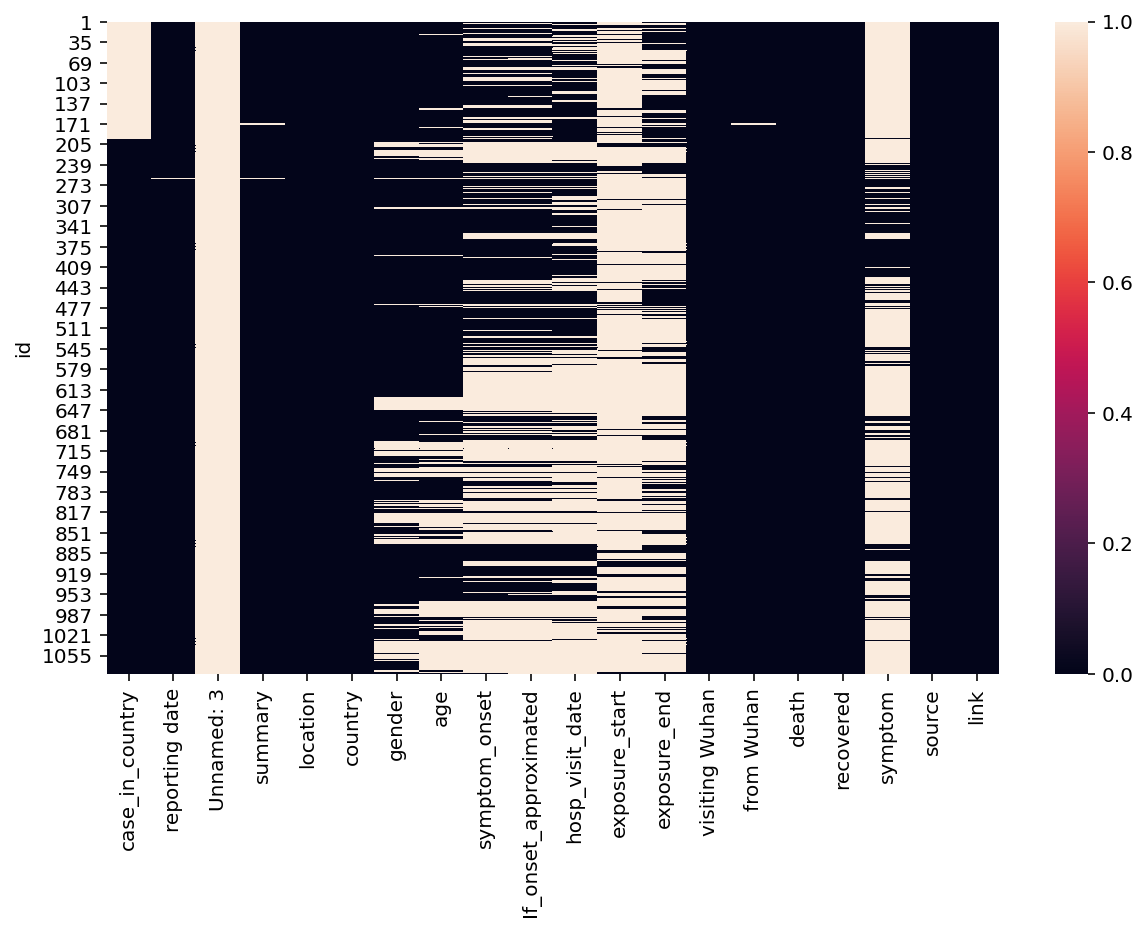

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(covid.isnull()==True,cbar=True)

#### Covid.info() gives me more info on what is missing; I notice we are missing a lot of symptoms

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 1 to 1085
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_in_country        888 non-null    float64
 1   reporting date         1084 non-null   object 
 2   Unnamed: 3             0 non-null      float64
 3   summary                1080 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 902 non-null    object 
 7   age                    843 non-null    float64
 8   symptom_onset          563 non-null    object 
 9   If_onset_approximated  560 non-null    float64
 10  hosp_visit_date        507 non-null    object 
 11  exposure_start         128 non-null    object 
 12  exposure_end           341 non-null    object 
 13  visiting Wuhan         1085 non-null   int64  
 14  from Wuhan             1081 non-null   float64
 15  deat

#### Here I get a feel of what summary looks like and the symptom column. This provides insight into how I should parse the summary column for symptoms. Looking at the unique values in the symptom column tells me what sort of symptoms I should be looking for when I scrape symptoms from the summary column.

In [7]:
covid['summary'];

In [8]:
covid['symptom'];

In [9]:
covid['symptom'].unique();

In [10]:
covid['symptom'].nunique()

108

### Task 2: Setup For Symptom Analysis and Frequency Distribution

#### Here I build a loop to scrape symptoms from the summary column. I build the 'symptom_list' to act as a repository of symptom key words. I loop through each row, grab each summary entry that is not 'nan,' tokenize each summary, and then check to see if each tokenized word belongs to the 'symptom_list.' If it does then I either append to the current string in the corresponding symptom entry (if symptoms are already listed), or I set the value of the corresponding symptom entry to the new symptom (in the case that the symptom entry was 'nan'). 

#### One will notice that I do not chunk here to catch some of the multi-word symptoms (i.e. difficulty breathing, soar, throat, etc.). This was due to time contraints as well as analysis that suggested these multi-word symptoms were very rare and may not prove helpful in later analysis. 

In [11]:
symptom_list = ['pneumonia','fever','cough','breathing','vomiting','myalgia','flu','cramps',
                'reflux','dyspnea','thirst','abdominal', 'headache','runny','diarrhea','chills','malaise']

for index,row in covid.iterrows():
    if isinstance(covid.iloc[index-1]['summary'],str):
        word_tokens=nltk.word_tokenize(covid.iloc[index-1]['summary'])
        for word in word_tokens:
            if word in symptom_list:
                if isinstance(covid.iloc[index]['symptom'],str):
                    if word not in covid.iloc[index]['symptom']:
                        covid.iloc[index]['symptom'] = covid.iloc[index]['symptom'] + ','+ str(word)
                else:
                    covid.set_value(index,'symptom',word)
            

#https://pythonprinciples.com/blog/check-if-var-is-string/

AttributeError: 'DataFrame' object has no attribute 'set_value'

#### Check symptom column to ensure new values have been imputed; covid.info() reveals that we have added around 230 symptoms to rows that previously had none (increase from 270 to 501).

In [12]:
covid['symptom'];

In [13]:
covid.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 1 to 1085
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_in_country        888 non-null    float64
 1   reporting date         1084 non-null   object 
 2   Unnamed: 3             0 non-null      float64
 3   summary                1080 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 902 non-null    object 
 7   age                    843 non-null    float64
 8   symptom_onset          563 non-null    object 
 9   If_onset_approximated  560 non-null    float64
 10  hosp_visit_date        507 non-null    object 
 11  exposure_start         128 non-null    object 
 12  exposure_end           341 non-null    object 
 13  visiting Wuhan         1085 non-null   int64  
 14  from Wuhan             1081 non-null   float64
 15  deat

# Data Analysis

### Task 2 (cont.): Symptom Frequency Distribution

#### Here I make a single list from the newly imputed symptom column; I construct the list of all symptoms using the 'to_list' method. 

In [14]:
list_of_symptoms = covid['symptom'].to_list()

In [15]:
len(list_of_symptoms)

1085

#### Next, I have to split up strings in symptom entries that contain more than one symptom. I create a 'split_list' function to do this. I split each item that contains a ',' (sign of multiple symptoms existing) and then add the newly split single symptoms to a new list. I return this new list.

In [16]:
def split_list(my_list):
    new_list = []
    for index,item in enumerate(my_list):
        if isinstance(item,str):
            if ',' in item:
                #print(item)
                new_item = item.split(', ')
                #print(new_item)
                new_list.extend(new_item)
                #my_list.remove(item)
            else:
                new_list += [item]
    return new_list


#https://stackoverflow.com/questions/41806030/split-string-within-list-into-words-in-python
        

In [17]:
symp_list = split_list(list_of_symptoms)

#### I inspect the new list by looking at all unique values; notice there are items with multiple symptoms anymore.

In [18]:
set(symp_list)

{'abdominal pain',
 'aching muscles',
 'breathlessness',
 'chest discomfort',
 'chest pain',
 'chill',
 'chills',
 'cold',
 'cough',
 'cough with sputum',
 'coughing',
 'diarrhea',
 'difficult in breathing',
 'difficulty breathing',
 'dyspnea',
 'fatigue',
 'feaver',
 'feve\\',
 'fever',
 'flu',
 'flu symptoms',
 'headache',
 'heavy head',
 'high fever',
 'itchy throat',
 'joint pain',
 'loss of appetite',
 'malaise',
 'mild cough',
 'mild fever',
 'muscle aches',
 'muscle cramps',
 'muscle pain',
 'myalgia',
 'myalgias',
 'nasal discharge',
 'nausea',
 'physical discomfort',
 'pneumonia',
 'reflux',
 'respiratory distress',
 'runny nose',
 'shortness of breath',
 'sneeze',
 'sore body',
 'sore throat',
 'sputum',
 'thirst',
 'throat discomfort',
 'throat pain',
 'tired',
 'vomiting'}

In [19]:
symp_list.remove("feve\\")

In [20]:
symp_list.remove("feaver")

In [21]:
symp_list.remove("high fever")

In [22]:
symp_list.remove("difficult in breathing")

In [23]:
symp_list.remove("runny")

ValueError: list.remove(x): x not in list

In [24]:
symp_list.remove("throat discomfort")

In [25]:
symp_list.remove("mild fever")

In [26]:
symp_list.remove("cough with sputum")

In [27]:
symp_list.remove("muscle aches")

In [28]:
symp_list.remove("muscle pain")

In [29]:
symp_list.remove("physical discomfort")

In [30]:
symp_list.remove("chest discomfort")

#### Here I use a countplot of the above constructed 'symp_list' to create the frequency bar chart. One will notice that pneumonia, fever, and cough are by far the most prevalent. Headache, malaise, and sore throat also occur quite frequently. All other symptoms appear less than 15 times.

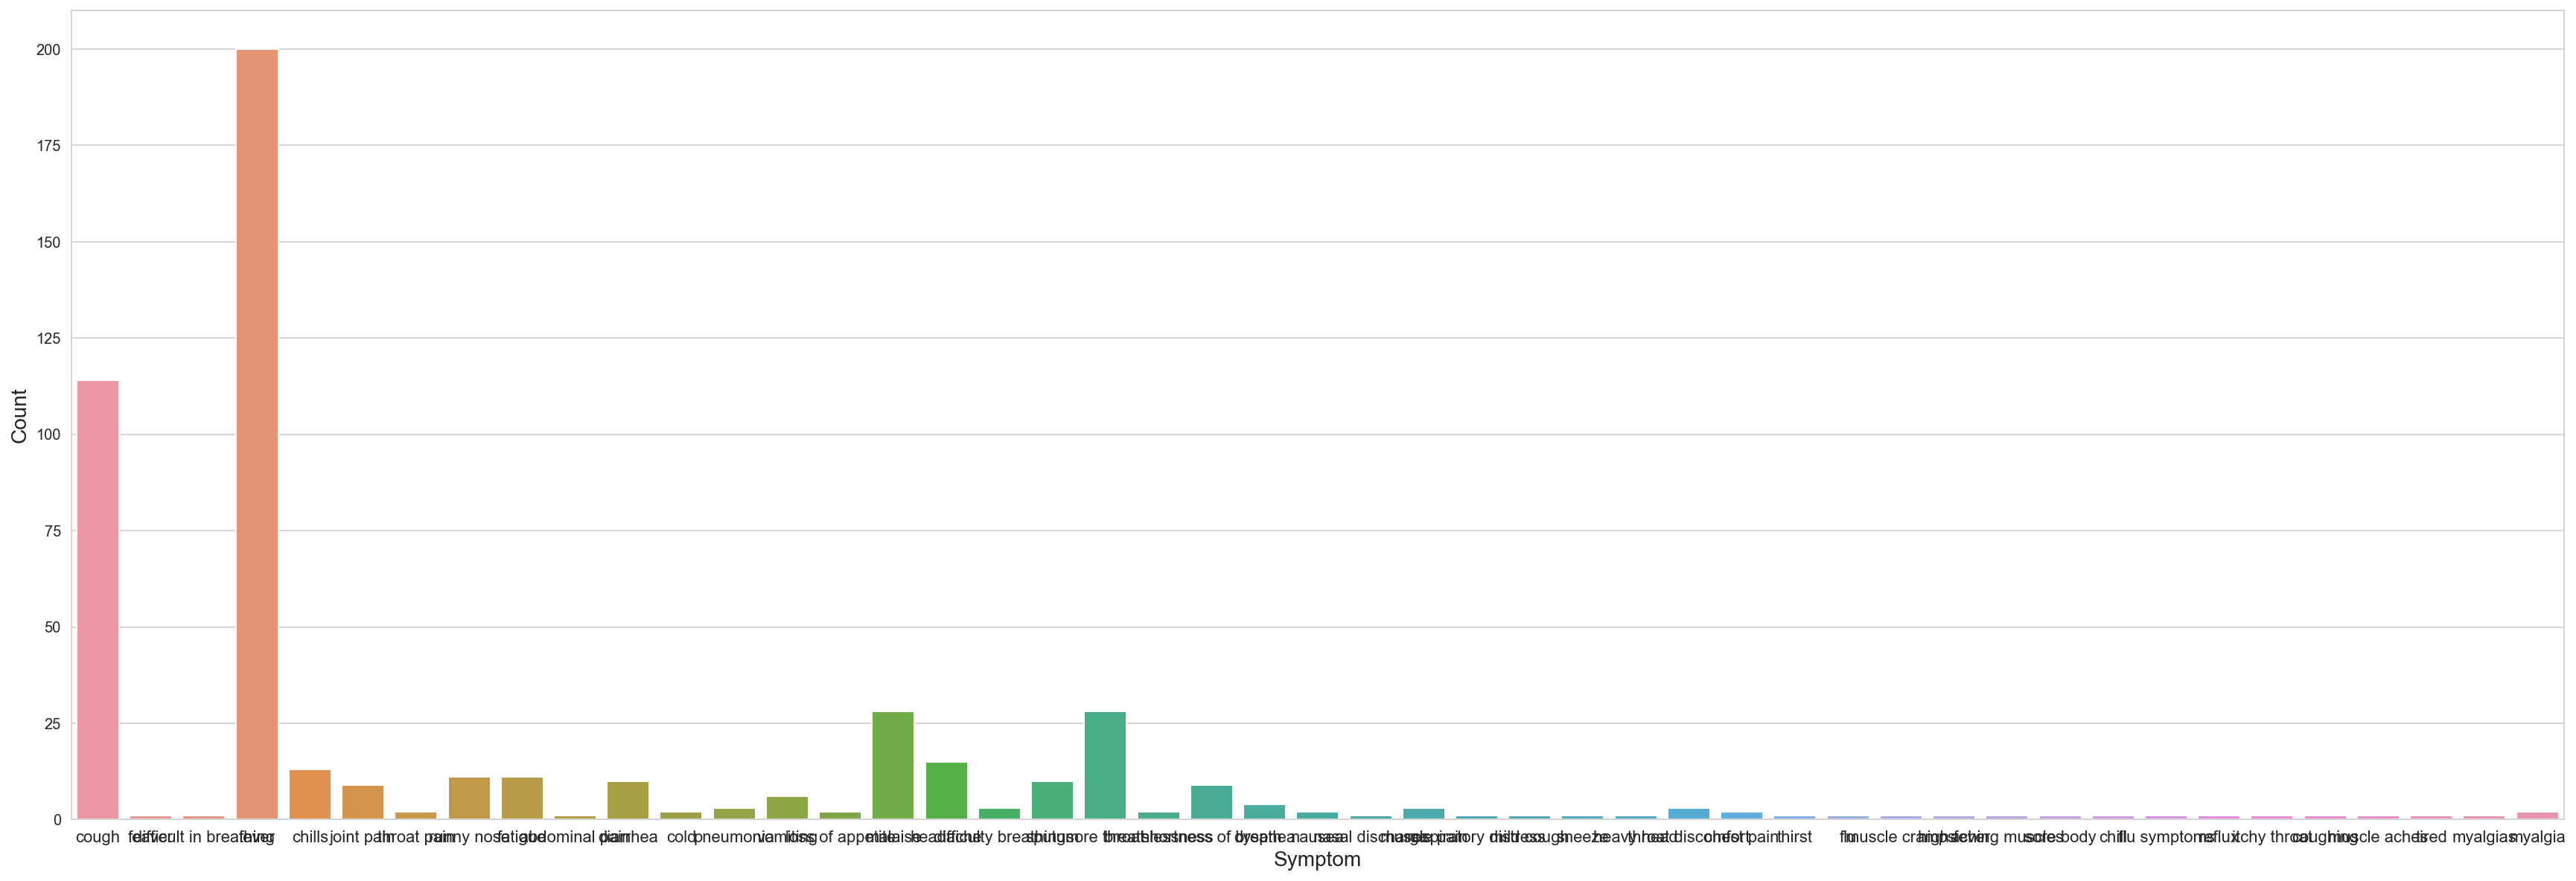

In [31]:
plt.figure(figsize=(30,10))

sns.set_style('whitegrid')
sns.countplot(symp_list)
plt.xlabel("Symptom",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=11)
plt.show()

## Analyze Symptoms in Relation to Other Variables

#### Due to difficulty making a different column for each symptom, I create a new df called 'symptom_select' below that filters out all symptoms in covid['symptom'] that do not appear at least three times. The symptom column in this new df still contains symptom entries comprised of multiple symptoms. 

In [32]:
symptom_select = covid.groupby('symptom').filter(lambda x: len(x) >= 3)
#symptom_select

#https://stackoverflow.com/questions/30485151/python-pandas-exclude-rows-below-a-certain-frequency-count

In [33]:
symptom_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 197 to 1031
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_in_country        162 non-null    float64
 1   reporting date         163 non-null    object 
 2   Unnamed: 3             0 non-null      float64
 3   summary                163 non-null    object 
 4   location               163 non-null    object 
 5   country                163 non-null    object 
 6   gender                 162 non-null    object 
 7   age                    159 non-null    float64
 8   symptom_onset          155 non-null    object 
 9   If_onset_approximated  155 non-null    float64
 10  hosp_visit_date        133 non-null    object 
 11  exposure_start         21 non-null     object 
 12  exposure_end           54 non-null     object 
 13  visiting Wuhan         163 non-null    int64  
 14  from Wuhan             163 non-null    float64
 15  dea

### Task 3: Assessing Symptom Distinction Based on Gender

#### Here I drop the one row in 'symptom_select' that has a 'nan' value for gender. 

In [34]:
symptom_select = symptom_select.dropna(axis=0, subset = ['gender'])


#### A construct a countplot with gender as the hue for this plot. Notice that there are more males with each symptom (due to there being more males in the data set) except for the combination 'fever, runny nose,' 'runny nose,' 'headache,' and 'cough,sputum.' 

#### Again, symptoms were not split due to difficulty figuring out how to split and create additional columns. With that said, including combinations of various symptoms is an interesting way to look at the effects different combinations might have on victims.

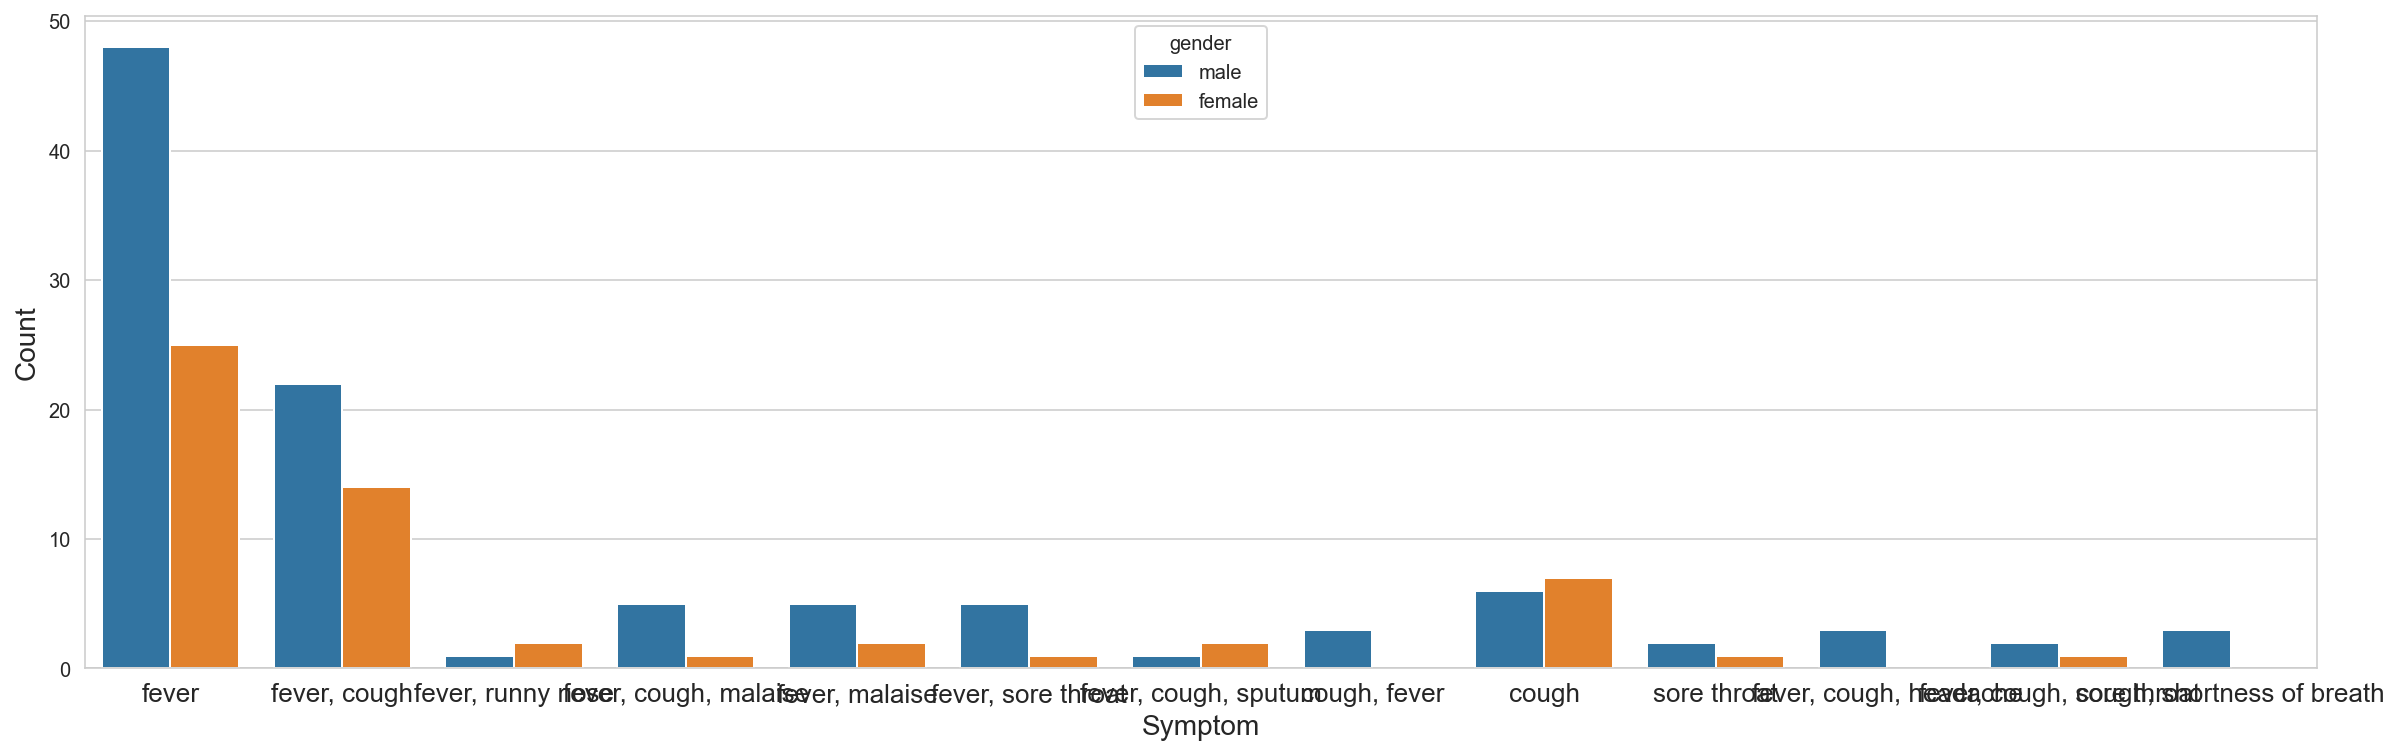

In [35]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='symptom',hue='gender',data=symptom_select)
plt.xlabel("Symptom",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()


### Task 4: Assessing Symptom Distinction Based on Age

#### I fill in missing age rows of 'symptom_select' with average of all ages. This is feasible because there was not much missing data.

In [36]:
symptom_select['age'].fillna(value=symptom_select['age'].mean(),inplace=True)


In [37]:
symptom_select['age'].max()

89.0

#### Below I use a binning technique to sort each sample into one of 5 age groups (kid (2-13), teen (13-20), young adult (20-40), middle age (40-60), or older (60+)). This is to produce a more manageable plot.

#### As can be seen below, older people appear to be disproportionately affected by more sever symptoms like fever, cough, and malaise. 

In [38]:
bins= [2,13,20,40,60,100]
labels = ['Kid','Teen','Young Adult','Middle Age','Older']
symptom_select['AgeGroup'] = pd.cut(symptom_select['age'], bins=bins, labels=labels, right=False)


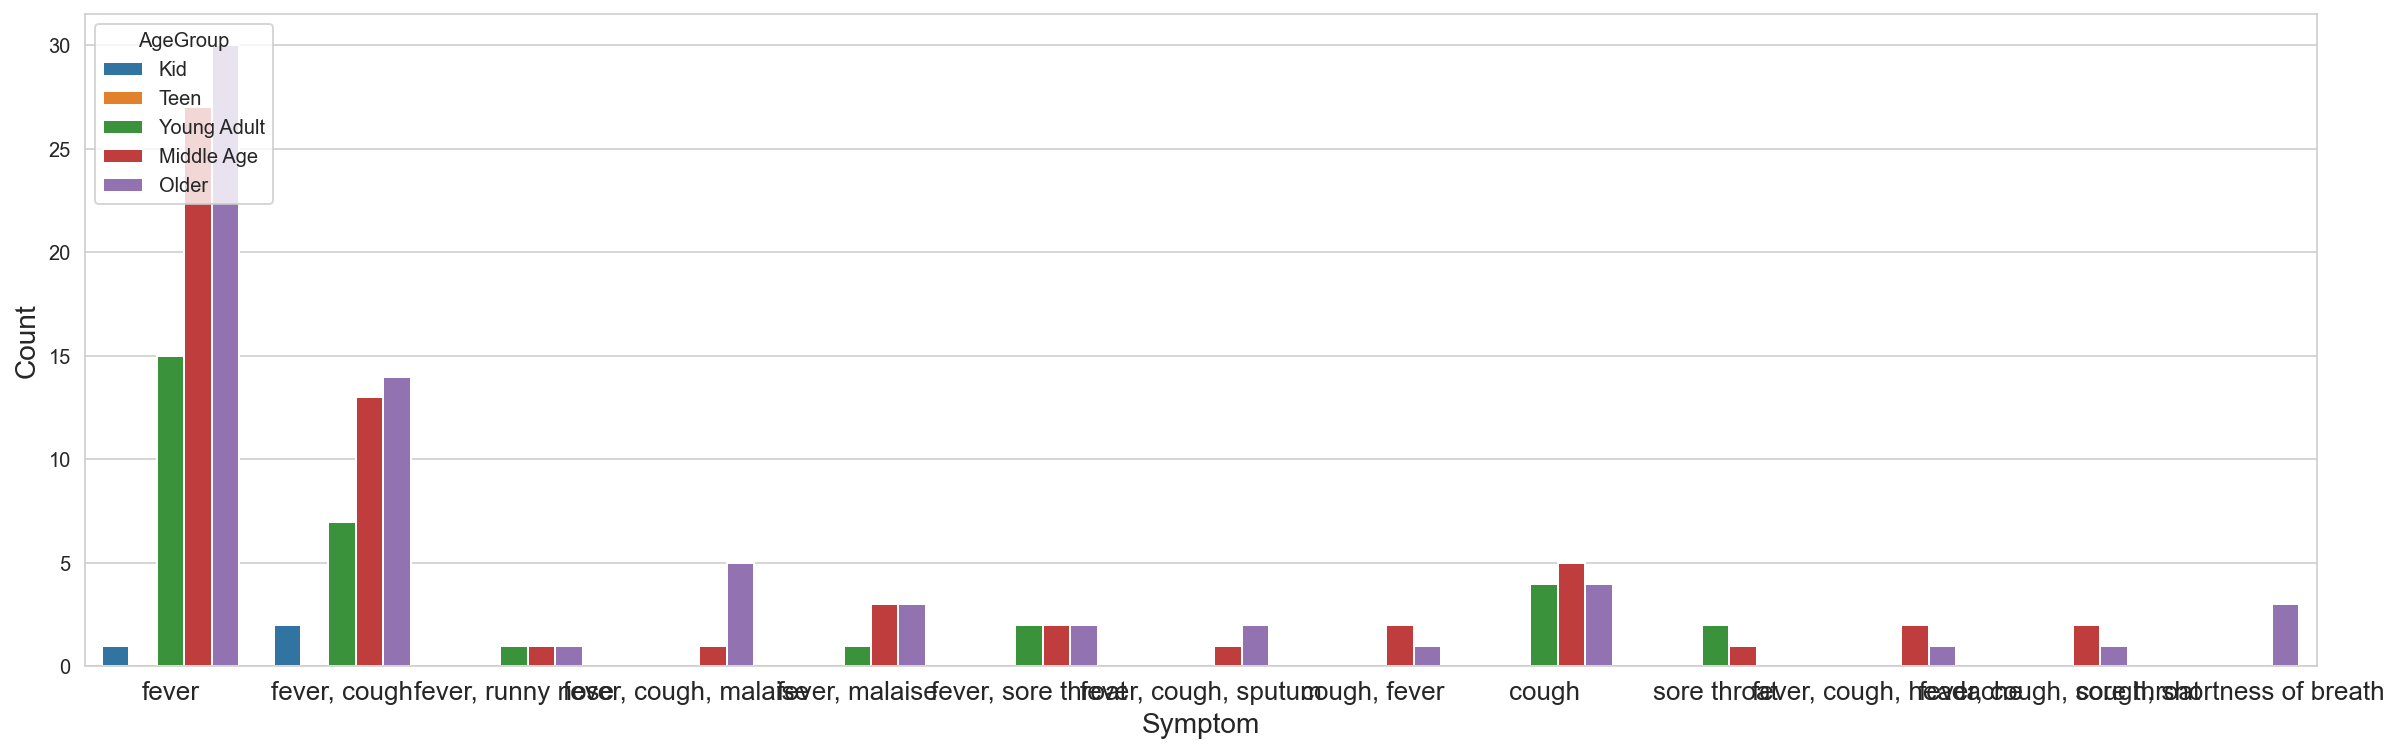

In [39]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='symptom',hue='AgeGroup',data=symptom_select)
plt.xlabel("Symptom",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

#https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas

### Task 5: Assessing Symptom Distinction Based on Country

#### To produce a more manageable plot, again I use the filter method to create a new df that only includes countries that appear at least 4 times (nice threshold value). This returns 9 countries seen in the plot below.

In [40]:
country_select = symptom_select.groupby('country').filter(lambda x: len(x) >= 4)
country_select['country'].nunique()

7

#### Due to differences in symptom reporting, China reports tons of pneumonia cases but not as many other symptoms. Japan appears to emphasize fever reports whereas Hong Kong emphasizes 'fever, cough, and malaise.' 

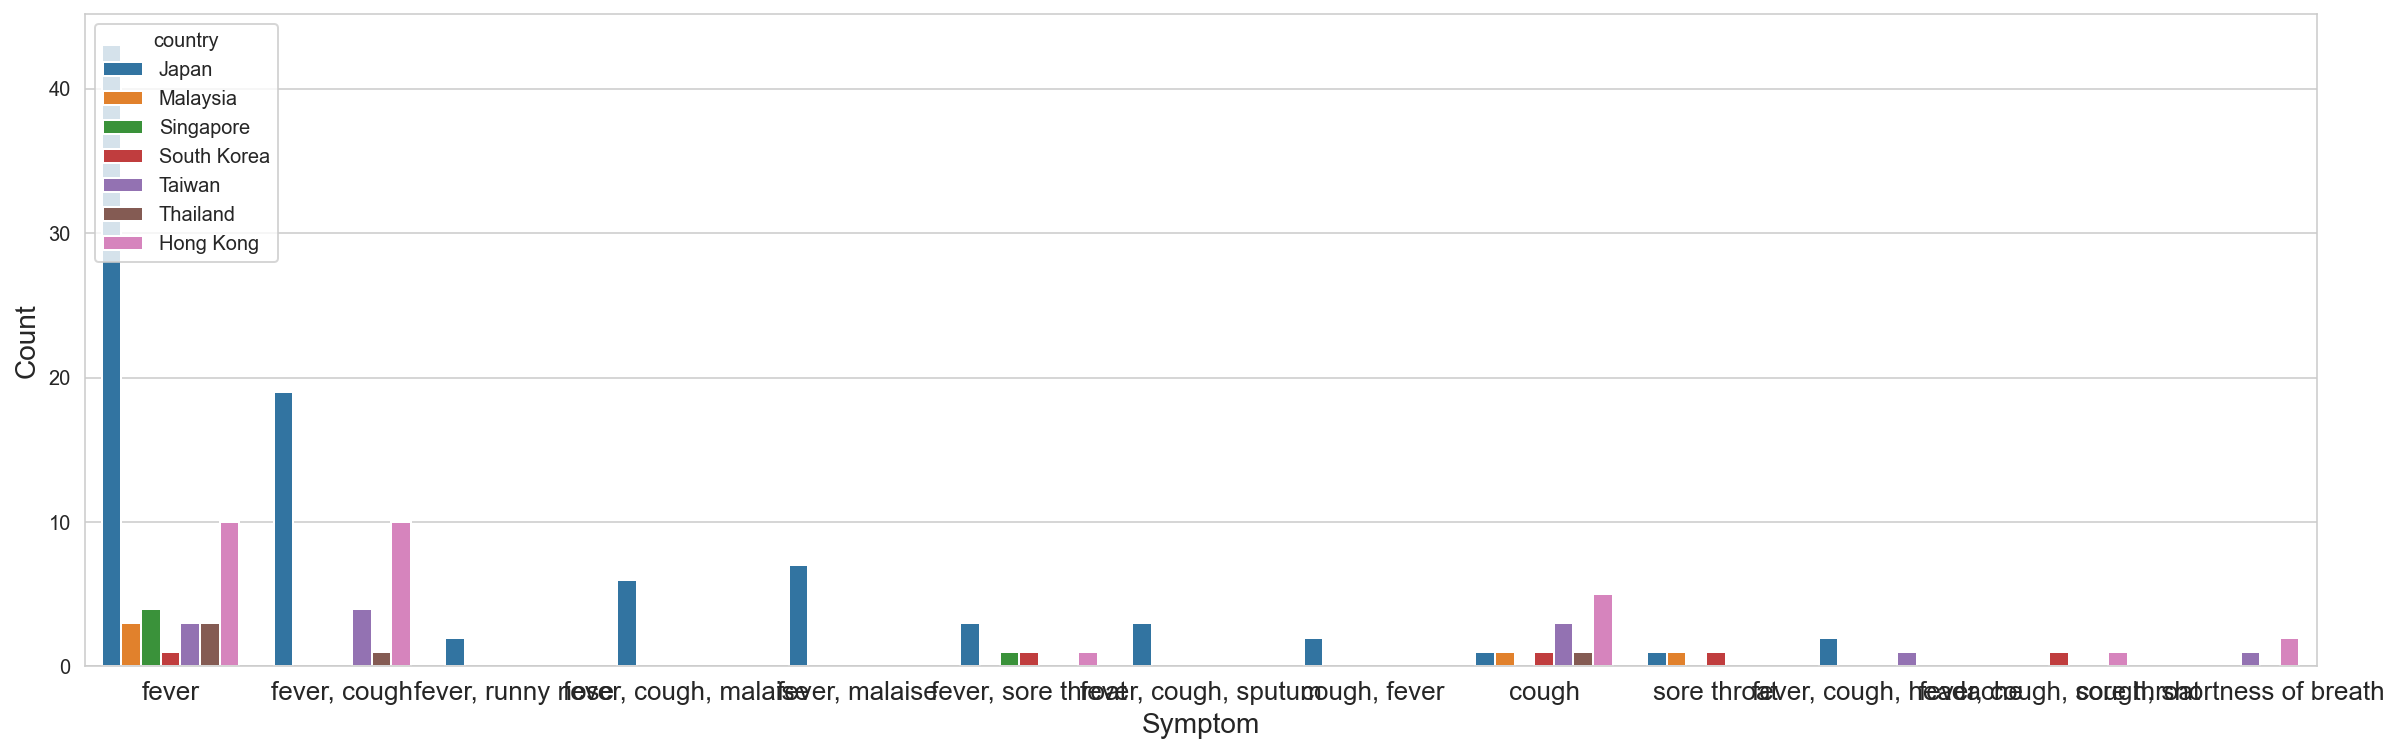

In [41]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
ax=sns.countplot(x='symptom',hue='country',data=country_select)
#ax.legend_.remove()
plt.xlabel("Symptom",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

### Task 6: How People Got Infected (From Wuhan vs. Visiting Wuhan)

#### Below I drop rows with missing data in column 'from Wuhan' and perform another countplot. As one can see, a vast majority of those in this data set are not from Wuhan. This makes sense because the majority of data in this data set arises from locations other than Wuhan.

In [42]:
covid = covid.dropna(axis=0, subset = ['from Wuhan'])

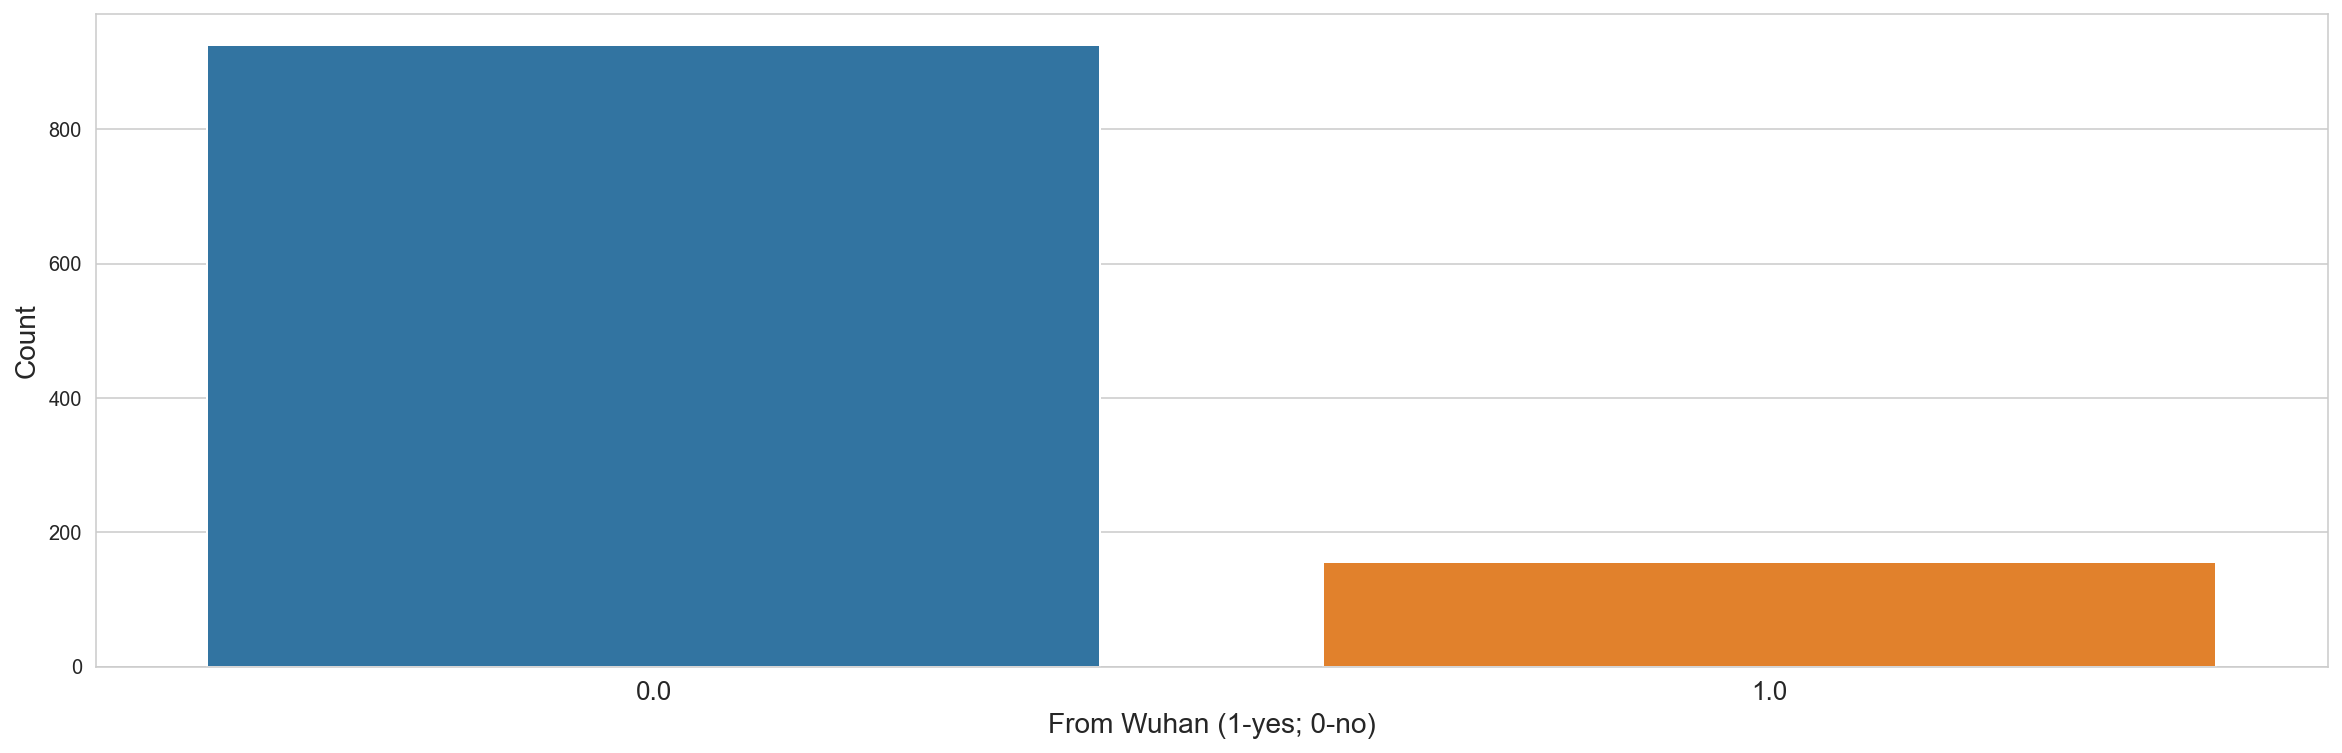

In [43]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='from Wuhan',data=covid)
plt.xlabel("From Wuhan (1-yes; 0-no)",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

#### As seen below, slightly more have visited Wuhan though the majority still has not.

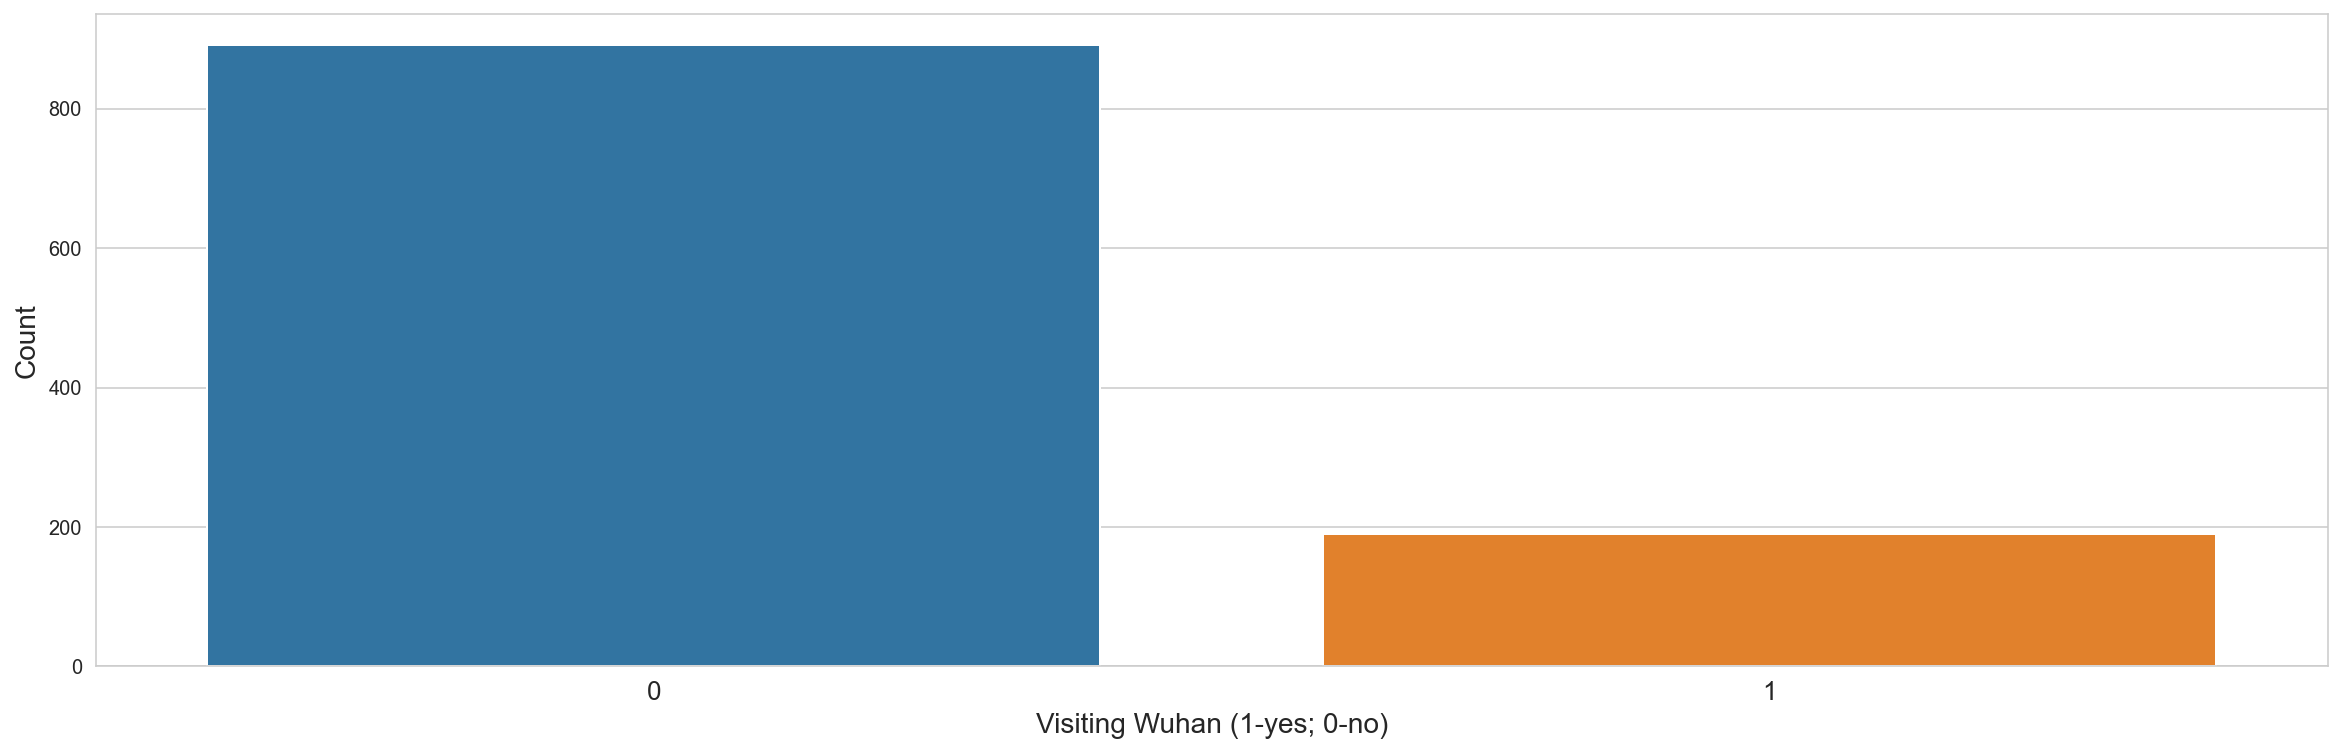

In [44]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='visiting Wuhan',data=covid)
plt.xlabel("Visiting Wuhan (1-yes; 0-no)",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()


### Task 7: Death Analysis

#### In this below filter I remove all entries in 'death' that are dates.

In [45]:
death_select = covid.groupby('death').filter(lambda x: len(x) >= 5)
death_select['death'];

#### Gender: Plot reveals more males are dying than females, though this is to be expected with more males in data set. It is interesting to note, however, that there seems to be a greater disparity between males who die and females who die than those who live. This suggests that males are at a higher risk of dying than females. 

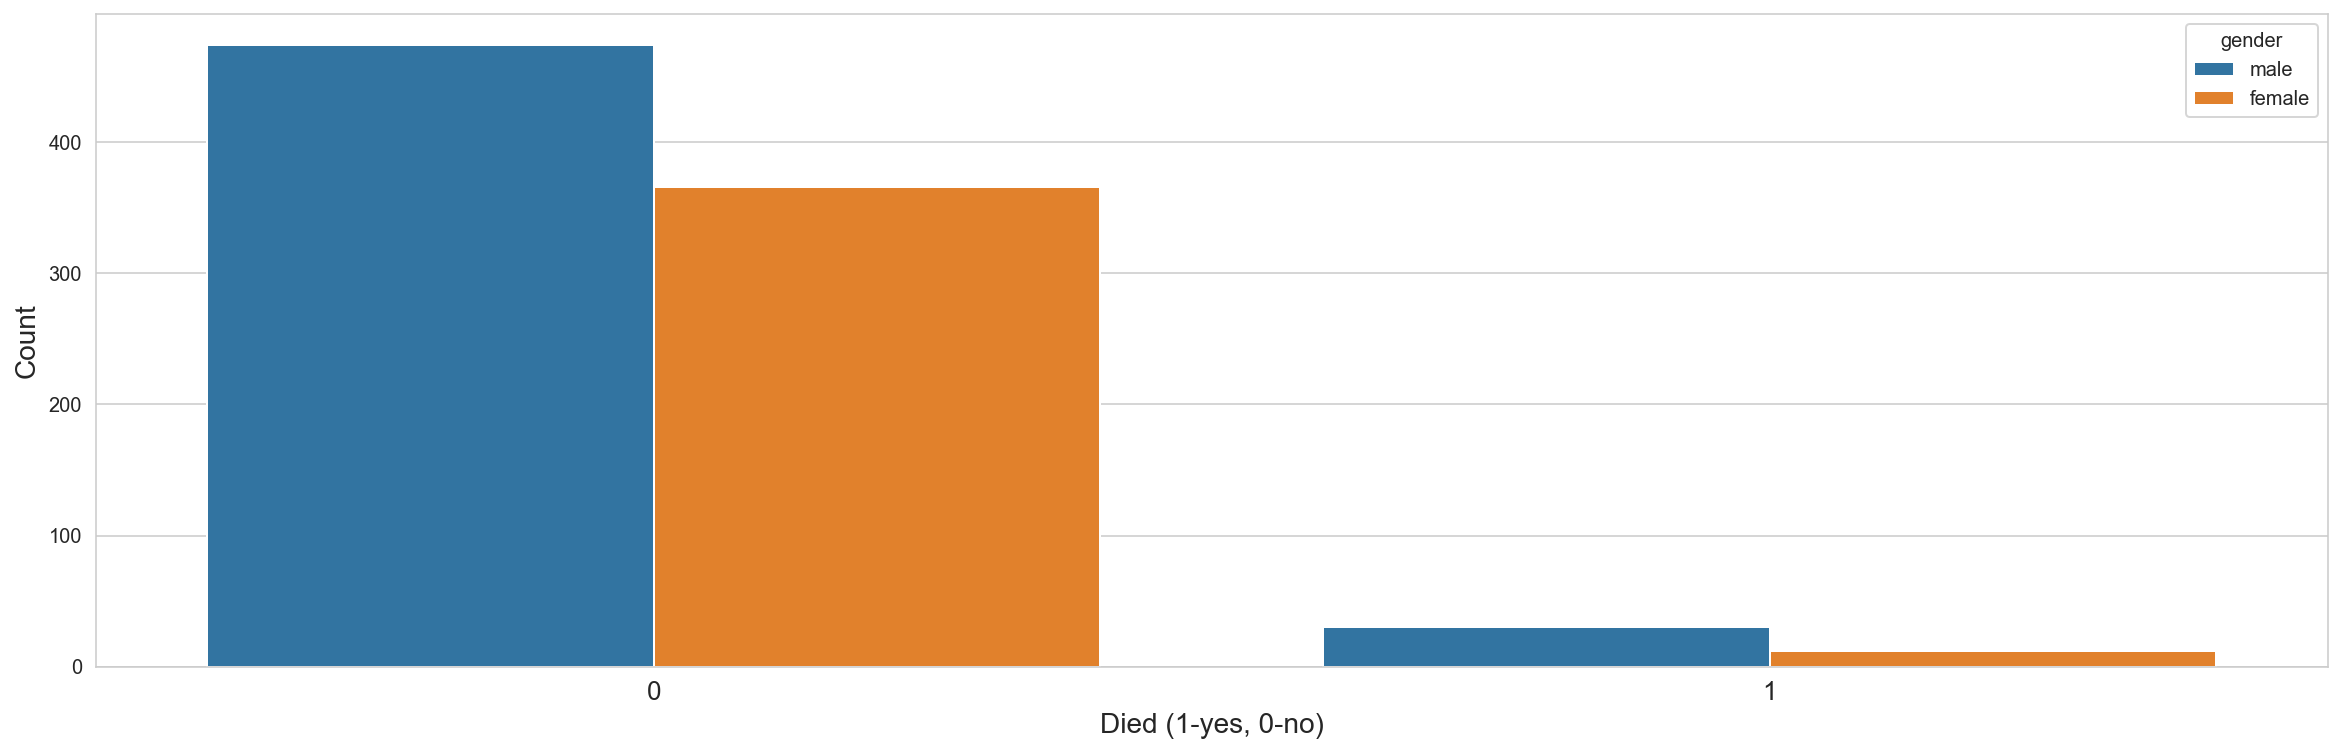

In [46]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='death',hue='gender',data=death_select)
plt.xlabel("Died (1-yes, 0-no)",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()


#### Age: This plot is very interesting. It confirms that older people disproportionately die relative to other age groups.

In [47]:
bins= [2,13,20,40,60,100]
labels = ['Kid','Teen','Young Adult','Middle Age','Older']

death_select['AgeGroup'] = pd.cut(death_select['age'], bins=bins, labels=labels, right=False)

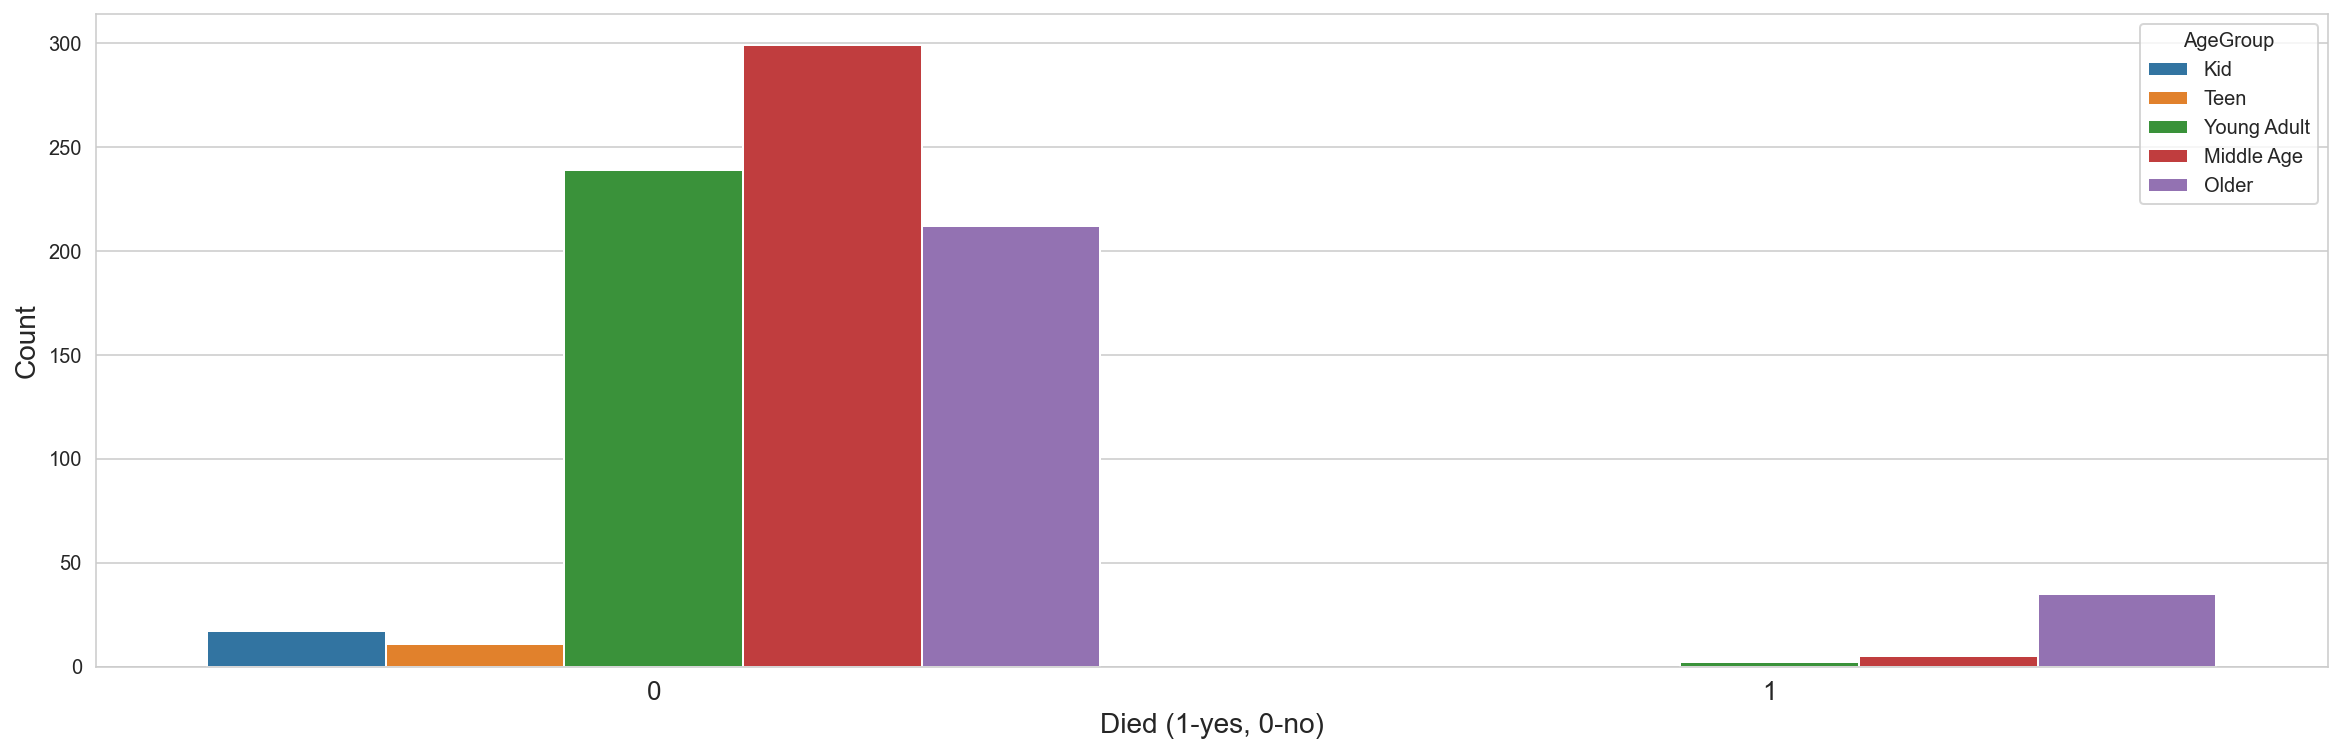

In [48]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='death',hue='AgeGroup',data=death_select)
plt.xlabel("Died (1-yes, 0-no)",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()


#### Symptom: Another interesting plot. Shows that most deaths are associated with pneumonia with some deaths associated with cough. This suggests that pneu 

In [49]:
death_symptom_select = death_select.groupby('symptom').filter(lambda x: len(x) >= 3)

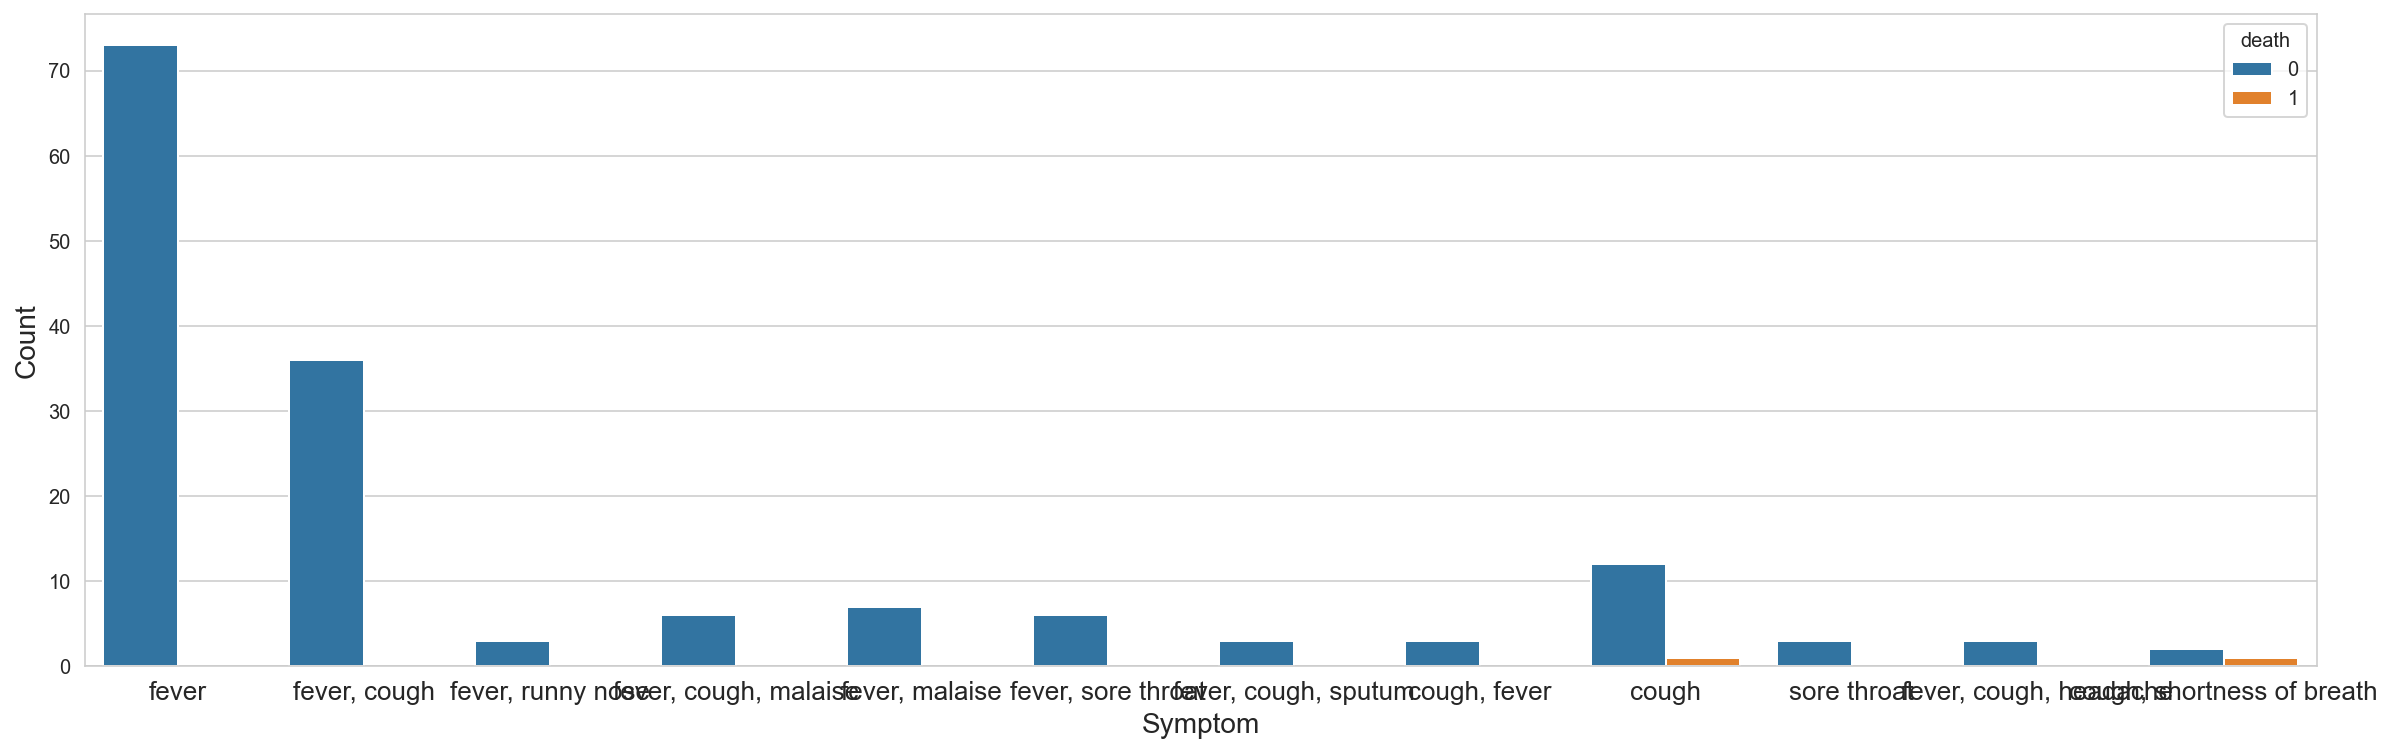

In [50]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='symptom',hue='death',data=death_symptom_select)
plt.xlabel("Symptom",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

### Task 8: Hosptilization Freq Analysis

#### Here I add a new column for dummy variable hospitalizations (previously in date form). Those that have a hospital date recorded are given a 1 while those who did not go to the hospital have a 0.

In [51]:
hospital_list = []
for index, row in covid.iterrows():
    if isinstance(row['hosp_visit_date'],str):
        hospital_list += [1]
    else:
        hospital_list += [0]

#type(covid.iloc[1]['hosp_visit_date'])

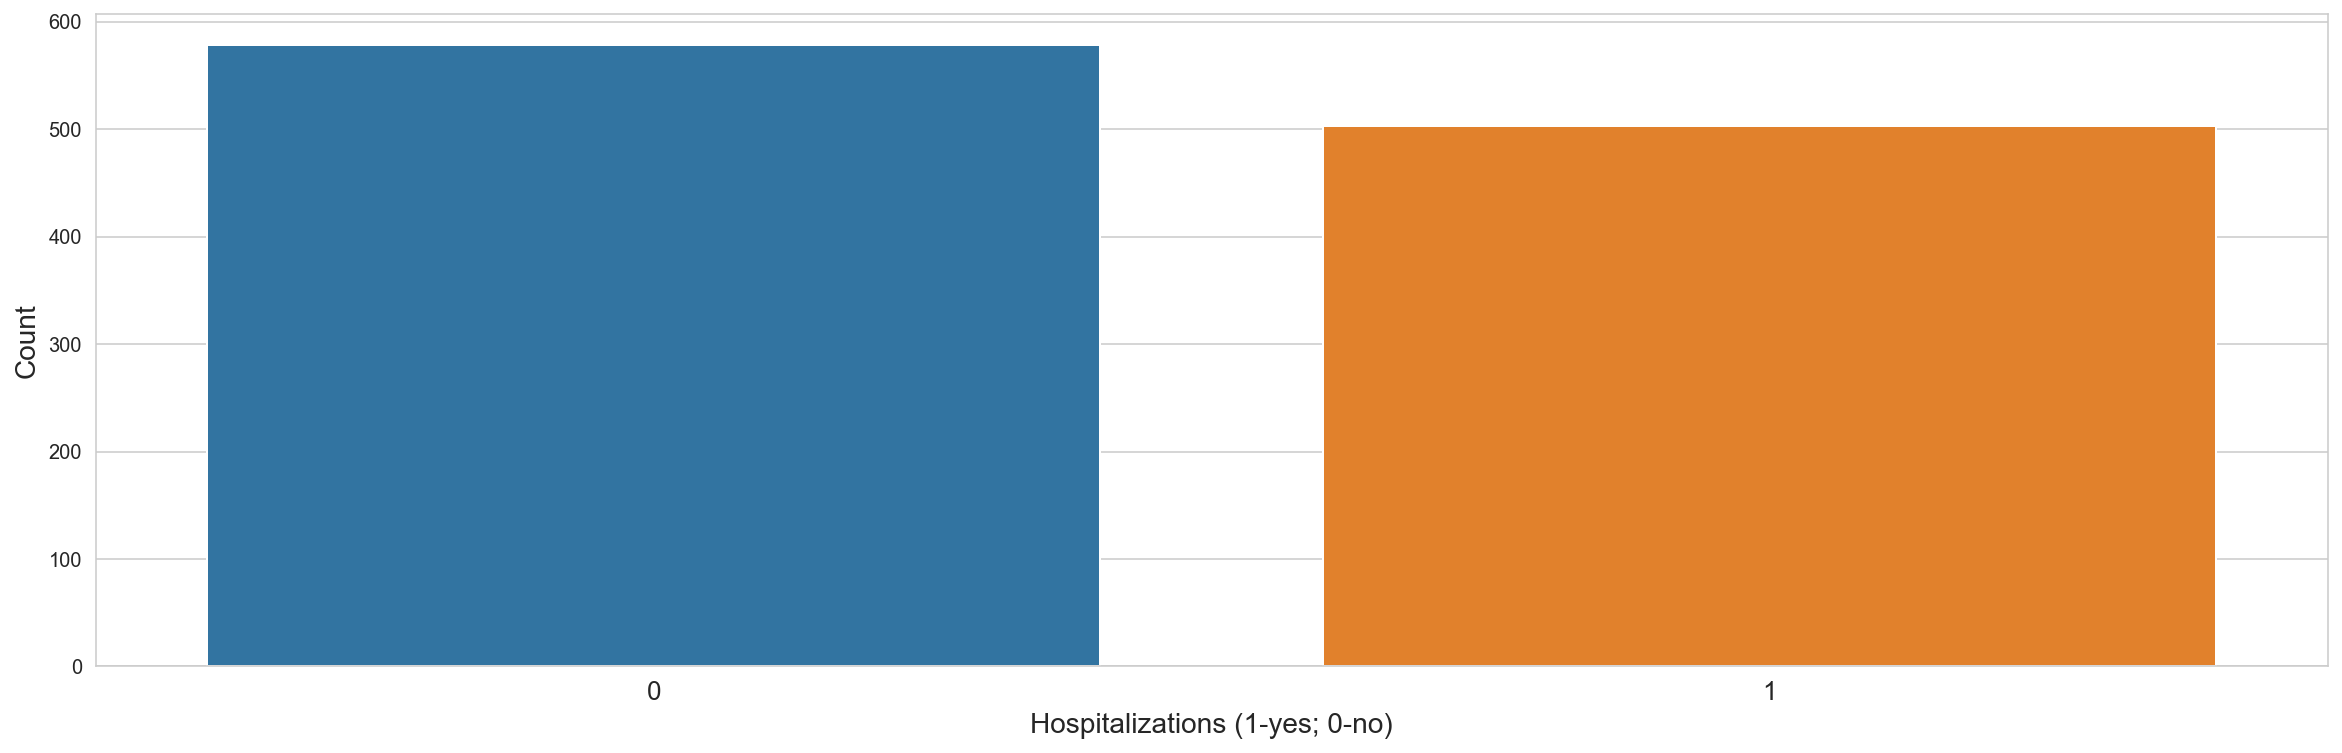

In [52]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(hospital_list)
plt.xlabel("Hospitalizations (1-yes; 0-no)",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

#### Task 9: Relationship Between Deaths and Hospitalizations

#### I do the same thing I did above, this time with the death_select df I created.

In [53]:
hospital_list2 = []
for index, row in death_select.iterrows():
    if isinstance(row['hosp_visit_date'],str):
        hospital_list2 += [1]
    else:
        hospital_list2 += [0]

#### Here I create a new column for death_select titled 'hospital.' It is the dummy variable version of hospital visits

In [54]:
death_select['hospital'] = hospital_list2

#### This plot shows that, of those who died, the vast majority had been hospitalized.

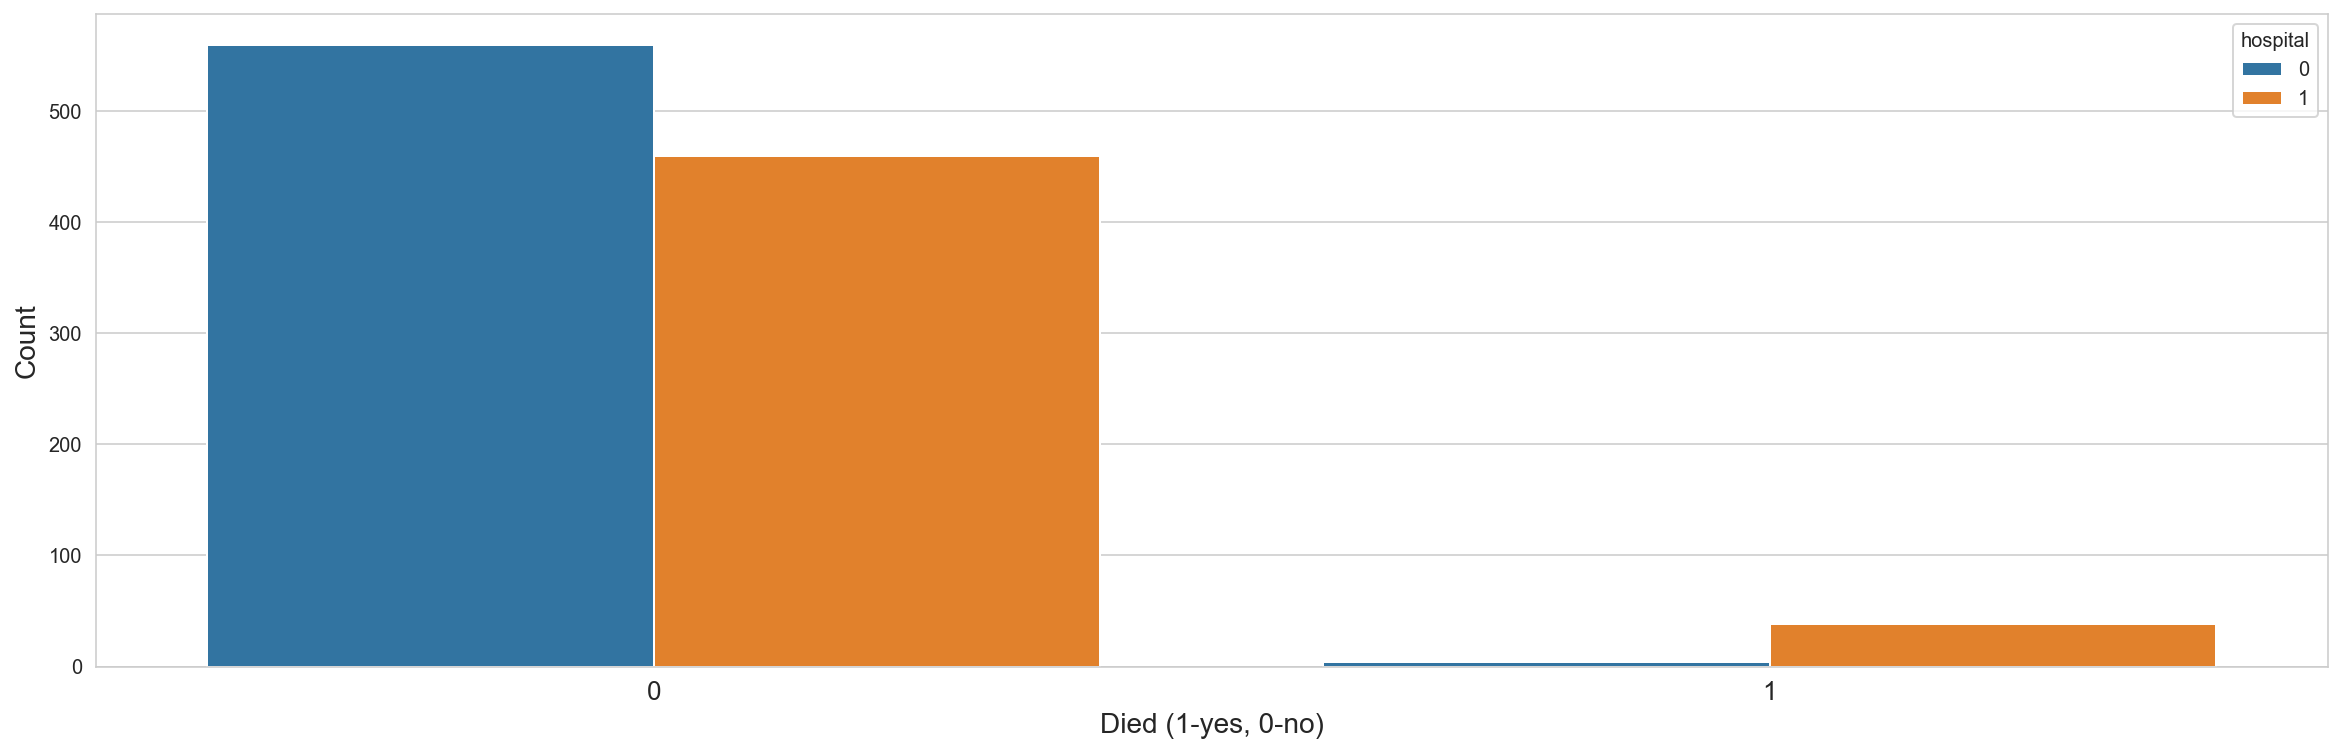

In [55]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='death',hue='hospital',data=death_select)
plt.xlabel("Died (1-yes, 0-no)",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

# Prediction

## Data Pre-processing

##### Having completed symptom analysis, we move to prediction. We first examine the dataset as a whole to get an idea of the distribution of missing values

In [56]:
covid=pd.read_csv('COVID19_data.csv',index_col=[0])

In [57]:
covid

,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,,
1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,12/29/2019,1/4/2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,1/12/2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,0.0,1/17/2020,NaN,1/3/2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...


In [58]:
covid.shape

(1085, 20)

In [59]:
covid['country'].isnull().sum()

0

In [60]:
covid['case_in_country'].isnull().sum()

197

In [61]:
covid['reporting date'].isnull().sum()

1

In [62]:
covid['Unnamed: 3'].isnull().sum()

1085

In [63]:
covid['summary'].isnull().sum()

5

In [64]:
covid['location'].isnull().sum()

0

In [65]:
covid['gender'].isnull().sum()

183

In [66]:
covid['age'].isnull().sum()

242

In [67]:
covid['symptom_onset'].isnull().sum()

522

In [68]:
covid['If_onset_approximated'].isnull().sum()

525

In [69]:
covid['hosp_visit_date'].isnull().sum()

578

In [70]:
covid['exposure_start'].isnull().sum()

957

In [71]:
covid['exposure_end'].isnull().sum()

744

In [72]:
covid['visiting Wuhan'].isnull().sum()

0

In [73]:
covid['from Wuhan'].isnull().sum()

4

In [74]:
covid['death'].isnull().sum()

0

In [75]:
covid['recovered'].isnull().sum()

0

In [76]:
covid['symptom'].isnull().sum()

815

In [77]:
((covid['recovered']=="0") & (covid['death']=="1")).sum()

42

##### It quickly becomes apparent that many columns in the dataset are missing enough values to be considered virtually useless in prediction efforts. These columns include exposure dates, if onset approximated, symptom onset date, and hospital visit date. all these columns are missing over half their values. In our symptom analysis, we imputed symptoms from the summary column where the symptom column was lacking. Though this netted substantially fewer missing symptom values, we still are missing about half. Thus we drop symptom and summary columns as well. Additionally, some columns simply do not seem practically significant for predicting death or recovery, so we drop these too. These include reporting date, link, source, and case in country identifier. Lastly, we drop location since it often is redundant with country.

In [78]:
covid1 = covid.drop(['exposure_start','exposure_end','Unnamed: 3','case_in_country','If_onset_approximated','symptom_onset','hosp_visit_date','source','link','reporting date','symptom','summary','location'],axis=1)

In [79]:
covid1

,country,gender,age,visiting Wuhan,from Wuhan,death,recovered
id,,,,,,,
1,China,male,66.0,1,0.0,0,0
2,China,female,56.0,0,1.0,0,0
3,China,male,46.0,0,1.0,0,0
4,China,female,60.0,1,0.0,0,0
5,China,male,58.0,0,0.0,0,0
...,...,...,...,...,...,...,...
1081,Austria,NaN,24.0,0,0.0,0,0
1082,Afghanistan,NaN,35.0,0,0.0,0,0
1083,Algeria,male,NaN,0,0.0,0,0


##### Next we must deal with our response variable, death or recovery. As we can see now, it is currently split into two separate columns: death and recovered. We merge these into one column which we dub 'status.'

In [80]:
def func(col):
    if col['death'] == "0" and col['recovered'] != "0":
        return 2
    if col['death'] == "0" and col['recovered'] == "0":
        return 1
    if col['death'] != "0" and col['recovered'] == "0":
        return 0
    


In [81]:
covid1['status'] = covid1.apply(func,axis=1)


In [82]:
(covid1['status'] == 0).sum()

63

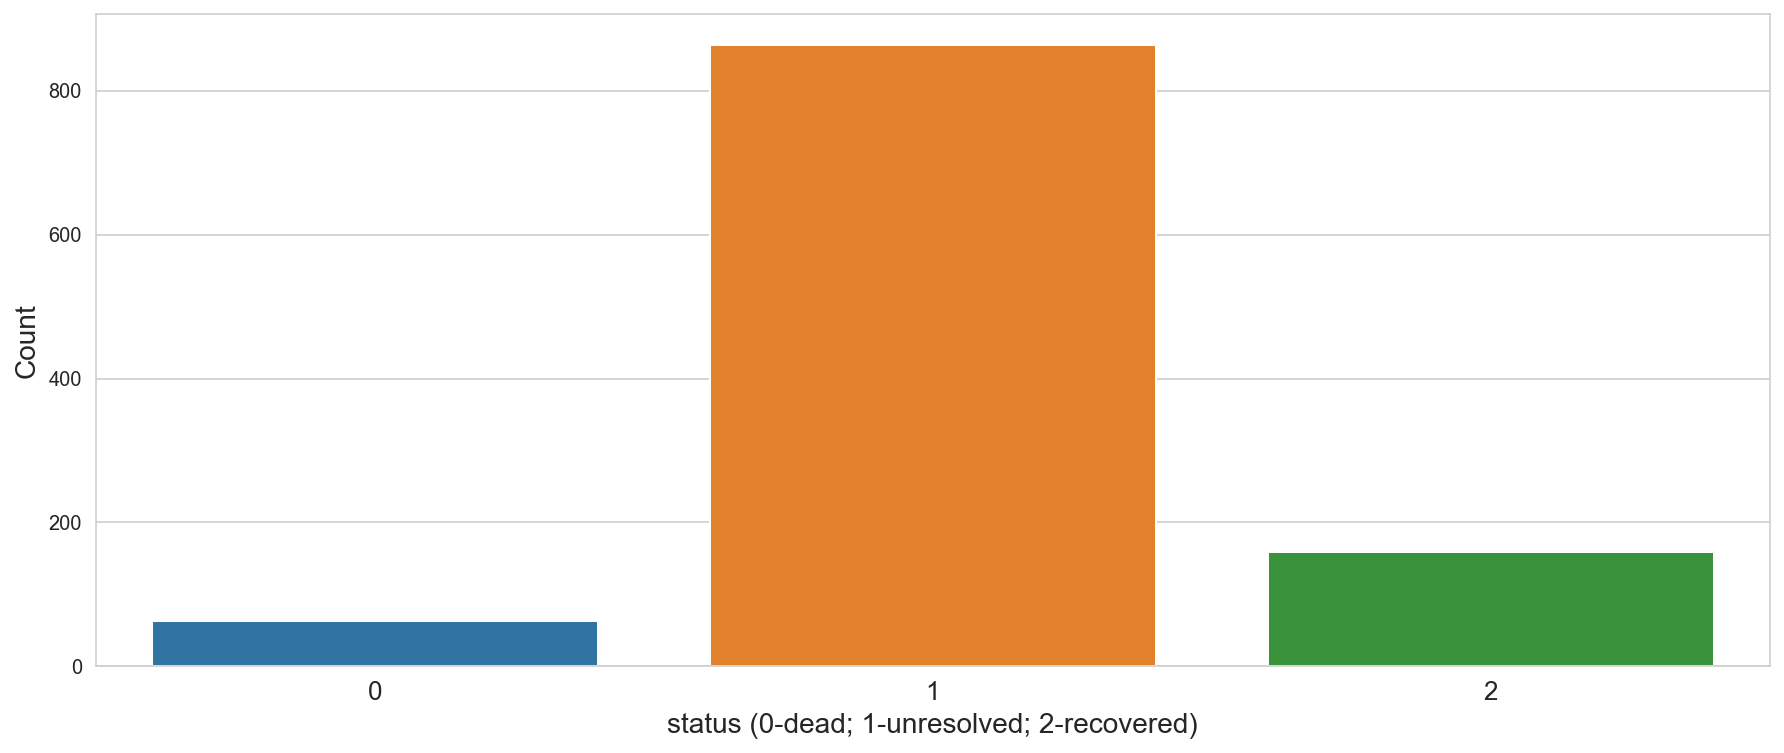

In [83]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='status',data=covid1)
plt.xlabel("status (0-dead; 1-unresolved; 2-recovered)",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()


##### We quickly find that the vast majority of cases are neither dead nor recovered: we label these 'unresolved.' Next we perform additional data cleaning steps including dropping the deprecated death and recovered columns, and converting variables to numeric values.

In [84]:
covid2 = covid1.drop(['death','recovered'],axis=1)
covid2

,country,gender,age,visiting Wuhan,from Wuhan,status
id,,,,,,
1,China,male,66.0,1,0.0,1
2,China,female,56.0,0,1.0,1
3,China,male,46.0,0,1.0,1
4,China,female,60.0,1,0.0,1
5,China,male,58.0,0,0.0,1
...,...,...,...,...,...,...
1081,Austria,NaN,24.0,0,0.0,1
1082,Afghanistan,NaN,35.0,0,0.0,1
1083,Algeria,male,NaN,0,0.0,1


In [85]:
covid3=pd.get_dummies(covid2,columns=['country','gender'],drop_first=True)
covid3

,age,visiting Wuhan,from Wuhan,status,country_Algeria,country_Australia,country_Austria,country_Bahrain,country_Belgium,country_Cambodia,...,country_Sri Lanka,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_UAE,country_UK,country_USA,country_Vietnam,gender_male
id,,,,,,,,,,,,,,,,,,,,,
1,66.0,1,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,56.0,0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.0,0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60.0,1,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,58.0,0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,24.0,0,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,35.0,0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1083,NaN,0,0.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### We opt to fill remaining NA values with the mean value of each column. We also exclude all 'unresolved' cases for now. This is based on the reasoning that it makes no sense to predict unresolved cases since this is a temporary phase which will progress to either death or recovery. Unfortunately, this drops our observation count drastically from 1085 to 222. Later, we will use semi-supervised techniques to attempt to label unresolved cases as likely dead or recovered and use them in prediction.

In [86]:
covid4 = covid3.fillna(covid3.mean())
covid5 = covid4[covid4['status']!=1]


In [87]:
X=covid5.drop('status',axis=1)
y=covid5['status']

##### Our final pre-processing step is to normalize our remaining predictor variables. We base this decision on the wildly different units of age versus its categorical counterparts

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [89]:
scaled=scaler.fit_transform(X)
X_sc=pd.DataFrame(scaled,columns=X.columns)

X_sc


,age,visiting Wuhan,from Wuhan,country_Algeria,country_Australia,country_Austria,country_Bahrain,country_Belgium,country_Cambodia,country_Canada,...,country_Sri Lanka,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_UAE,country_UK,country_USA,country_Vietnam,gender_male
0,0.577639,-0.432627,1.588650,0.0,-0.135457,0.0,0.0,0.0,0.0,-0.095346,...,-0.067267,0.0,0.0,-0.067267,-0.135457,-0.135457,-0.166667,-0.117041,-0.193347,0.833461
1,0.987493,-0.432627,1.588650,0.0,-0.135457,0.0,0.0,0.0,0.0,-0.095346,...,-0.067267,0.0,0.0,-0.067267,-0.135457,-0.135457,-0.166667,-0.117041,-0.193347,0.833461
2,2.012126,-0.432627,1.588650,0.0,-0.135457,0.0,0.0,0.0,0.0,-0.095346,...,-0.067267,0.0,0.0,-0.067267,-0.135457,-0.135457,-0.166667,-0.117041,-0.193347,0.833461
3,2.012126,-0.432627,1.588650,0.0,-0.135457,0.0,0.0,0.0,0.0,-0.095346,...,-0.067267,0.0,0.0,-0.067267,-0.135457,-0.135457,-0.166667,-0.117041,-0.193347,0.833461
4,0.833798,-0.432627,1.588650,0.0,-0.135457,0.0,0.0,0.0,0.0,-0.095346,...,-0.067267,0.0,0.0,-0.067267,-0.135457,-0.135457,-0.166667,-0.117041,-0.193347,0.833461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-0.012360,-0.432627,-0.629465,0.0,-0.135457,0.0,0.0,0.0,0.0,-0.095346,...,-0.067267,0.0,0.0,-0.067267,-0.135457,-0.135457,-0.166667,-0.117041,-0.193347,-1.199817
218,-0.012360,-0.432627,-0.629465,0.0,-0.135457,0.0,0.0,0.0,0.0,-0.095346,...,-0.067267,0.0,0.0,-0.067267,-0.135457,-0.135457,-0.166667,-0.117041,-0.193347,-1.199817
219,-0.012360,-0.432627,-0.629465,0.0,-0.135457,0.0,0.0,0.0,0.0,-0.095346,...,-0.067267,0.0,0.0,-0.067267,-0.135457,-0.135457,-0.166667,-0.117041,-0.193347,-1.199817
220,-0.012360,-0.432627,-0.629465,0.0,-0.135457,0.0,0.0,0.0,0.0,-0.095346,...,-0.067267,0.0,0.0,-0.067267,-0.135457,-0.135457,-0.166667,-0.117041,-0.193347,-1.199817


## Model Evaluation

##### Since our response variable (status) is categorical, prediction is largely limited to classification methods. We opt to use three common techniques: Logistic Regression, KNN Classifier, and Random Forest. We aggregate these methods into a Voting Classifier at the end to see if this can further improve prediction accuracy. 

In [90]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X_sc,y,test_size=0.2,random_state=11)

In [91]:

from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict
from sklearn.model_selection import cross_validate, RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## Logistic Regression

##### We optimize the penalty and C parameters in Logistic regression both analytically and graphically

In [92]:
params={
    'penalty':['l1','l2'],
    'C':np.arange(0.01,2,0.01)
       }

rs_lg=RandomizedSearchCV(LogisticRegression(solver='liblinear'),param_distributions=params,n_iter=10,cv=10)

In [93]:

rs_lg.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=...
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1

In [94]:
rs_lg.best_score_

0.9160130718954249

In [95]:

rs_lg.best_params_

{'penalty': 'l1', 'C': 0.53}

In [96]:
penalties=['l1','l2']
param_c=np.arange(0.01,2,0.1)

kf=KFold(n_splits=10,shuffle=True,random_state=11)

results=defaultdict(dict)

for reg in penalties:
    reg_dict={}
    for c in param_c:
        
        lg_cv=cross_validate(LogisticRegression(penalty=reg,C=c,solver='liblinear'),X_train,y_train,cv=kf)
        reg_dict['param_'+str(c)]=lg_cv['test_score'].mean()
    results[reg]=reg_dict

In [97]:

df=pd.DataFrame(results)
df.index=param_c
df.head()

,l1,l2
0.01,0.276797,0.903595
0.11,0.886928,0.903268
0.21,0.886928,0.903595
0.31,0.903595,0.909150
0.41,0.903268,0.914706


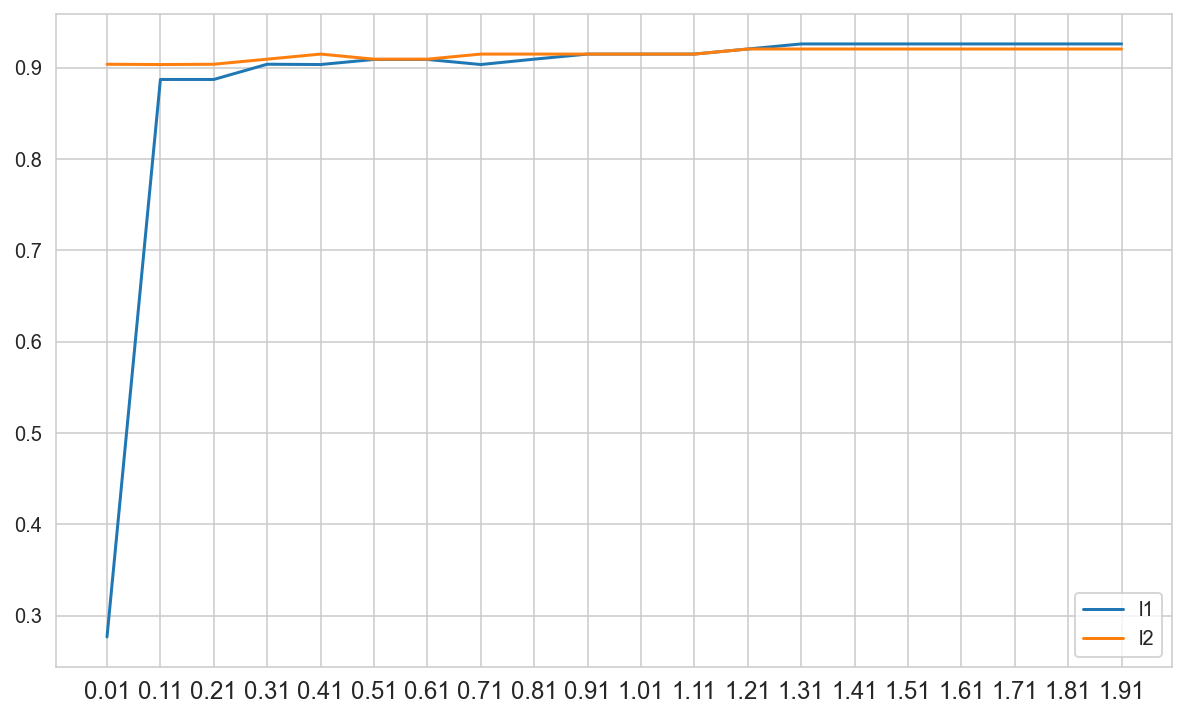

In [98]:



sns.set_style('whitegrid')

df.plot(figsize=(10,6))
plt.xticks(param_c,fontsize=12)
plt.show()

##### Having determined our best parameters, we fit our model and find a 93% test accuracy

In [99]:
lg=LogisticRegression(penalty='l1',C=1.46, solver='liblinear')

In [100]:
lg.fit(X_sc,y)

LogisticRegression(C=1.46, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
pred_lg=lg.predict(X_val)


In [102]:
accuracy_score(y_val,pred_lg)

0.9333333333333333

## KNN Classifier

##### We optimize the neighbors parameter in KNN in the same ways as before

In [103]:
params={
    'n_neighbors':np.arange(2,100,5)
       }

rs_knn=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=params,n_iter=10,cv=10)

In [104]:
rs_knn.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82,
       87, 92, 97])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [105]:
rs_knn.best_score_

0.8705882352941176

In [106]:
rs_knn.best_params_

{'n_neighbors': 37}

In [107]:
knn_res={}

for i in range(1,100,5):
    knn_cv=cross_validate(KNeighborsClassifier(n_neighbors=i),X_train,y_train,cv=kf)
    knn_res['K_'+str(i)]=knn_cv['test_score']

In [108]:
df_knn=pd.DataFrame(knn_res)
df_knn

,K_1,K_6,K_11,K_16,K_21,K_26,K_31,K_36,K_41,K_46,K_51,K_56,K_61,K_66,K_71,K_76,K_81,K_86,K_91,K_96
0,0.833333,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.722222,0.722222,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111
1,1.000000,0.944444,0.888889,0.833333,0.833333,0.888889,0.888889,0.888889,0.888889,0.888889,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111
2,0.833333,0.944444,0.944444,0.944444,0.944444,0.944444,0.944444,0.944444,0.944444,0.944444,0.944444,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889
3,0.888889,0.944444,0.833333,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889
4,0.833333,0.888889,0.888889,0.888889,0.888889,0.888889,0.833333,0.833333,0.833333,0.833333,0.833333,0.777778,0.833333,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778
5,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
6,0.833333,0.888889,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.666667,0.666667,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111,0.611111
7,0.764706,0.764706,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.882353,0.941176,0.941176,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
8,1.000000,1.000000,0.941176,0.882353,0.882353,0.882353,0.941176,0.941176,0.941176,0.941176,0.941176,0.941176,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
9,0.823529,0.823529,0.823529,0.823529,0.823529,0.764706,0.764706,0.764706,0.823529,0.470588,0.411765,0.411765,0.411765,0.411765,0.411765,0.411765,0.411765,0.411765,0.411765,0.411765


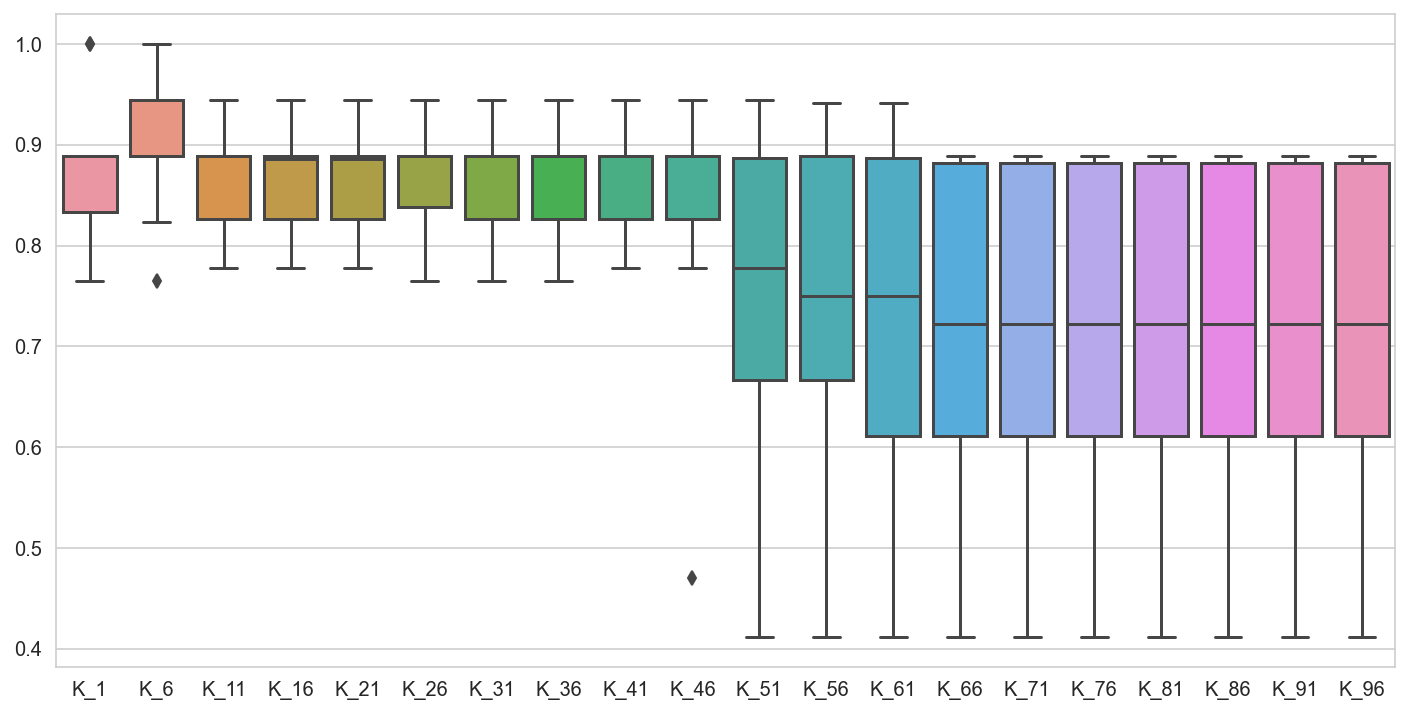

In [109]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_knn)
plt.show()

##### We opt for the graphical (k = 6) optimization since it seems more reasonable than the analytical (k = 37). After fitting our model, we find a 91% test accuracy

In [110]:

knn_6=KNeighborsClassifier(n_neighbors=6)

In [111]:
knn_6.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [112]:

knn_pred=knn_6.predict(X_val)
accuracy_score(y_val,knn_pred)

0.9111111111111111

## Random Forest

##### Lastly we use Random Forest. Here we optimize max depth of the trees and the number of estimators

In [113]:
params={
    'max_depth':np.arange(2,16,2),
    'n_estimators':np.arange(1,150,15)
       }

rs_rf=RandomizedSearchCV(RandomForestClassifier(max_features=5),param_distributions=params,n_iter=10,cv=10)

In [114]:

rs_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=5,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                   

In [115]:
rs_rf.best_score_

0.8882352941176471

In [116]:
rs_rf.best_params_

{'n_estimators': 16, 'max_depth': 14}

In [117]:
estimators=np.arange(1,150,15)
depths=np.arange(2,16,2)

kf=KFold(n_splits=10,shuffle=True,random_state=42)

results=defaultdict(dict)

for depth in depths:
    depth_dict={}
    for est in estimators:
        rf_cv=cross_validate(RandomForestClassifier(n_estimators=est,max_depth=depth, max_features=5),X_train,y_train,
                            cv=kf)
        
        depth_dict['n_est_'+str(est)]=rf_cv['test_score']
    results['depth_'+str(depth)]=depth_dict

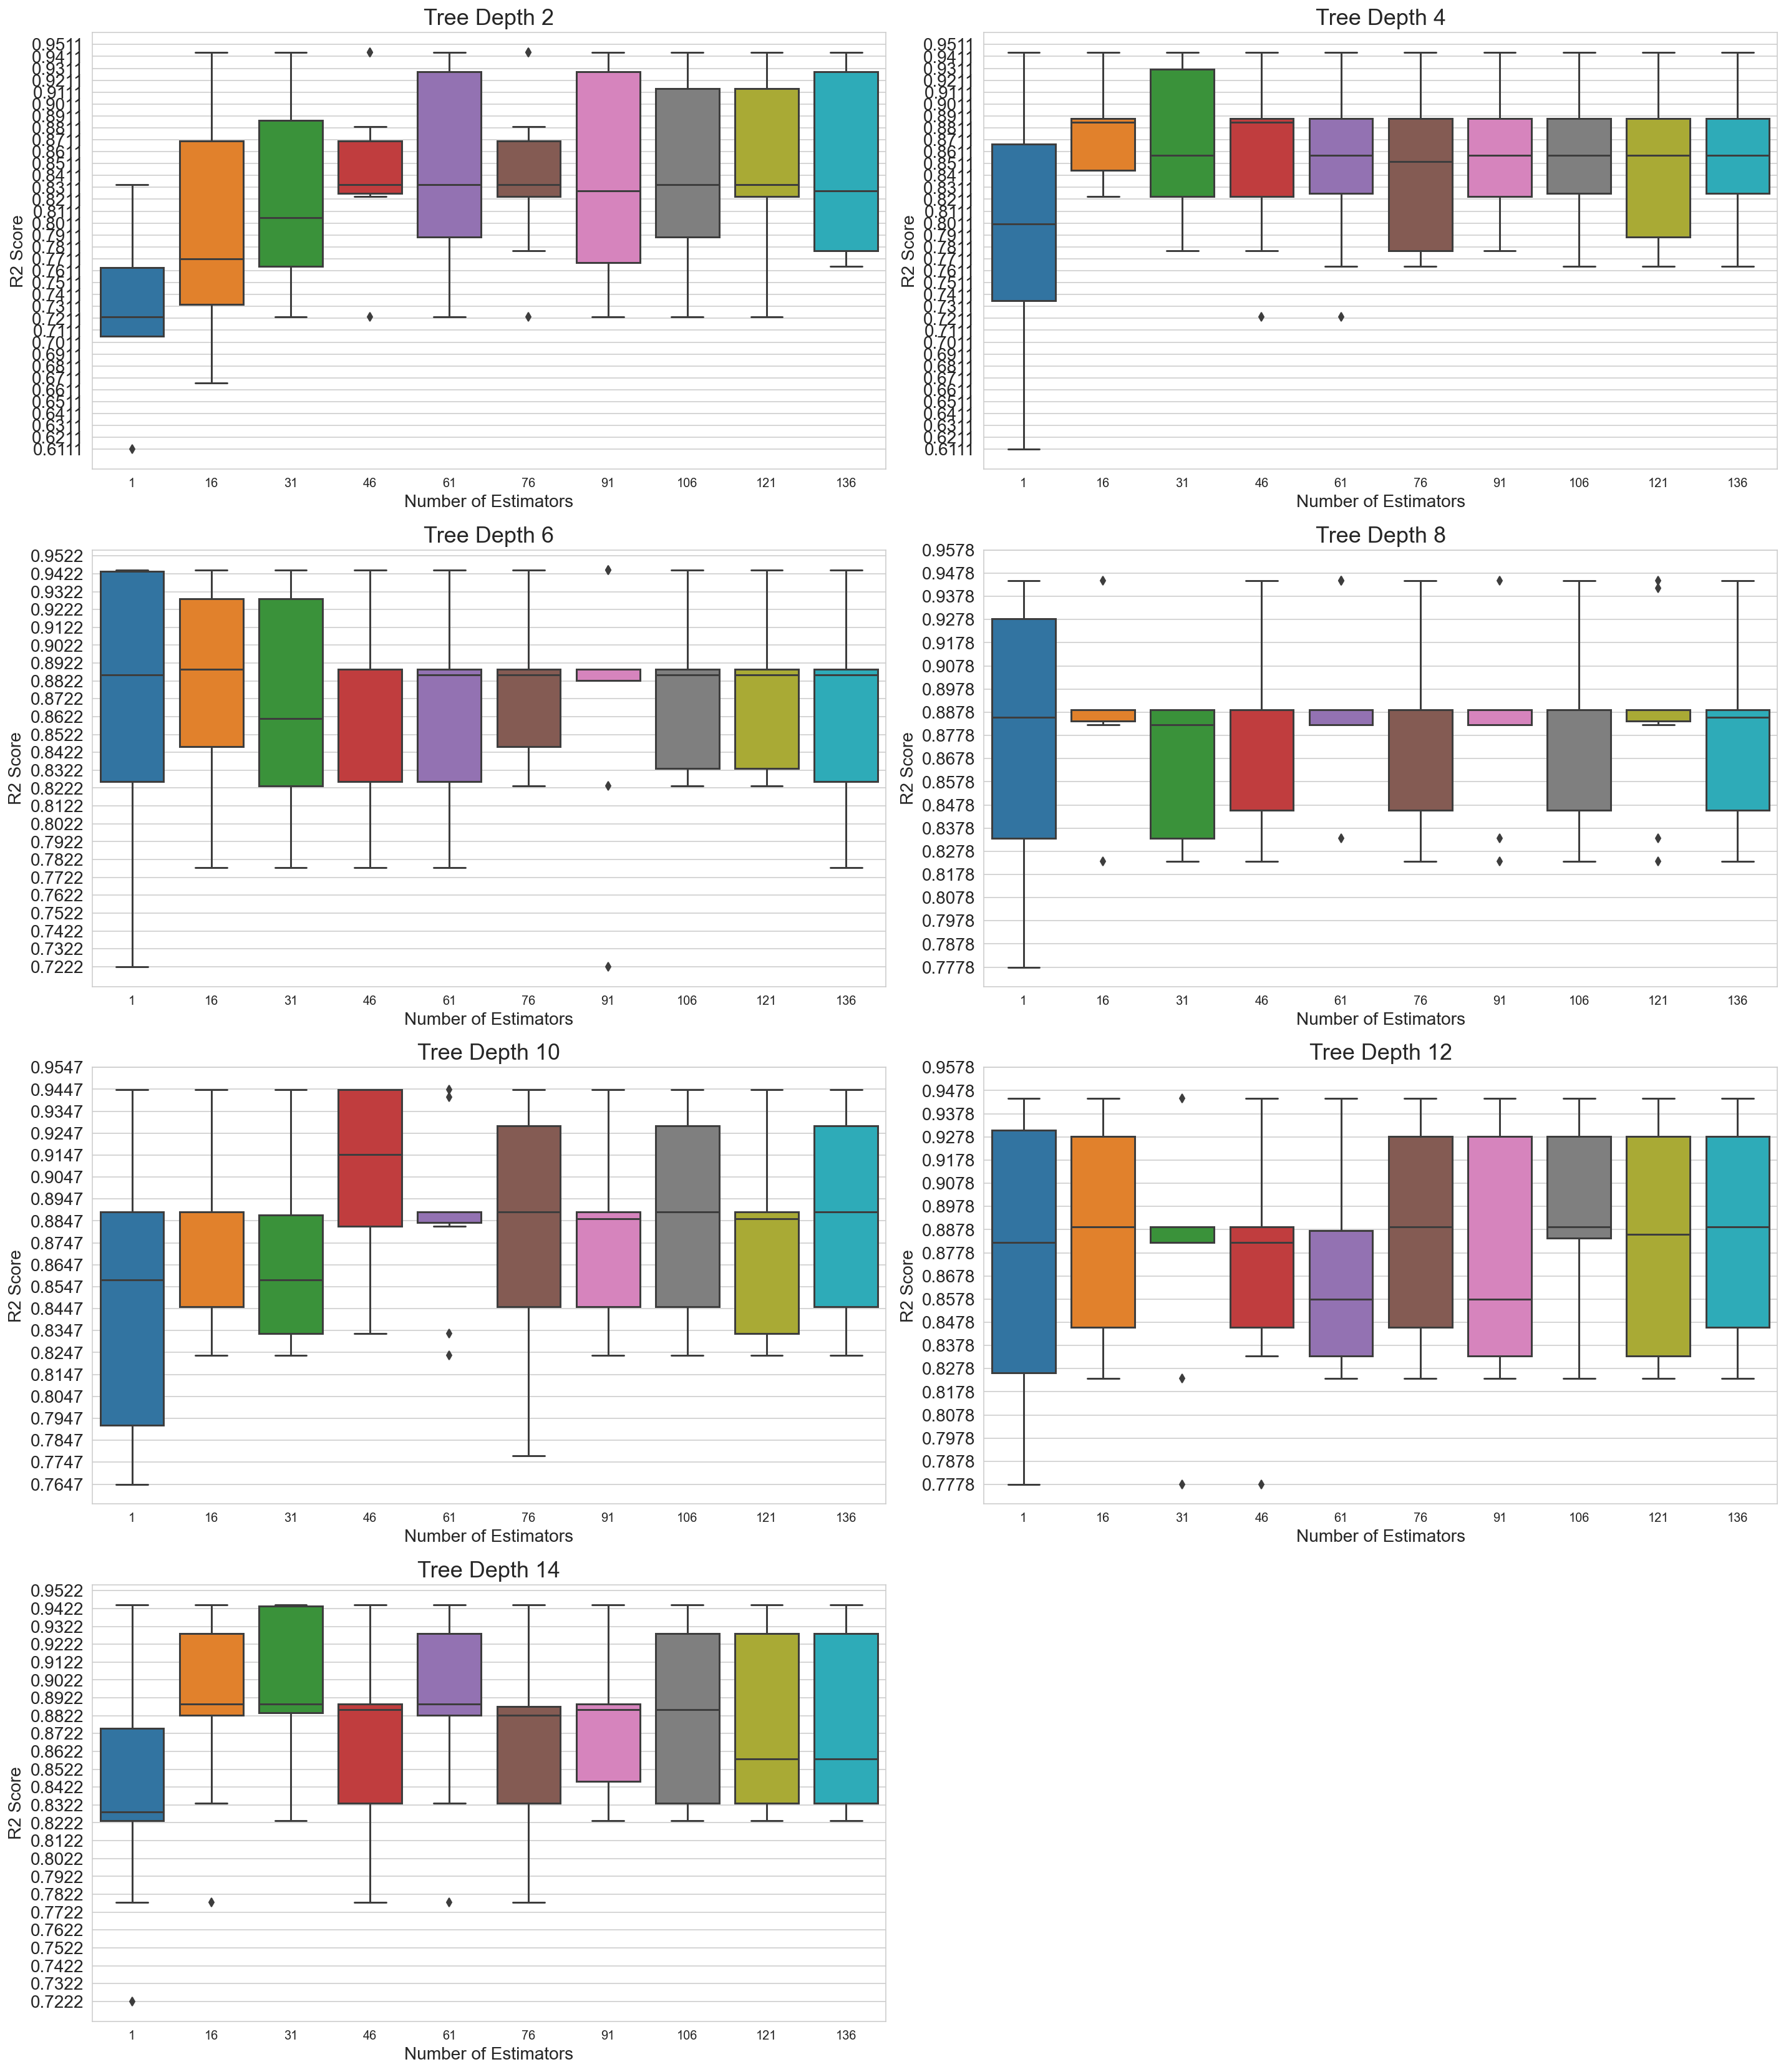

In [118]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,40))
m=len(results.keys())
n=len(results['depth_'+str(depth)].keys())
for i,depth in enumerate(depths,start=1):
    min_val=results['depth_'+str(depth)]['n_est_1'].min()
    plt.subplot(m,2,i)
    sns.boxplot(data=pd.DataFrame(results['depth_'+str(depth)]))
    plt.xticks(range(0,n),[x[6:] for x in results['depth_'+str(depth)].keys()])
    plt.yticks(np.arange(min_val,0.96,0.01),fontsize=14)
    plt.xlabel('Number of Estimators',fontsize=14)
    plt.ylabel("R2 Score",fontsize=14)
    plt.title("Tree Depth {}".format(depth),fontsize=18)
    
plt.tight_layout()

##### The Boxplots seem to agree that 106 estimators and max depth of 8 offers high accuracy, though many other combinations appear similar. We stick with the analytical determination and get a test accuracy of 89%

In [119]:
rf=RandomForestClassifier(n_estimators=106,max_depth=8, max_features=5)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=106,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:

rf_pred=rf.predict(X_val)
accuracy_score(y_val,rf_pred)

0.9111111111111111

## Voting Classifier

##### We combine the effects of our three classifiers into a voting classifier to see if we can beat Logistic Regression's test accuracy. For each observation, the algorithm 'votes' with all three classifiers on each prediction to make an overall prediction

In [121]:

from sklearn.ensemble import VotingClassifier

##### We weight the classifier based on the strength of each algorithm individually, with logistic regression getting the largest weight

In [122]:


vcf=VotingClassifier(estimators=[('lg',lg),('knn',knn_6),('rf',rf)],voting='hard',
                    weights=[5,1,2])

In [123]:

vcf_cv=cross_validate(vcf,X_train,y_train,cv=kf)

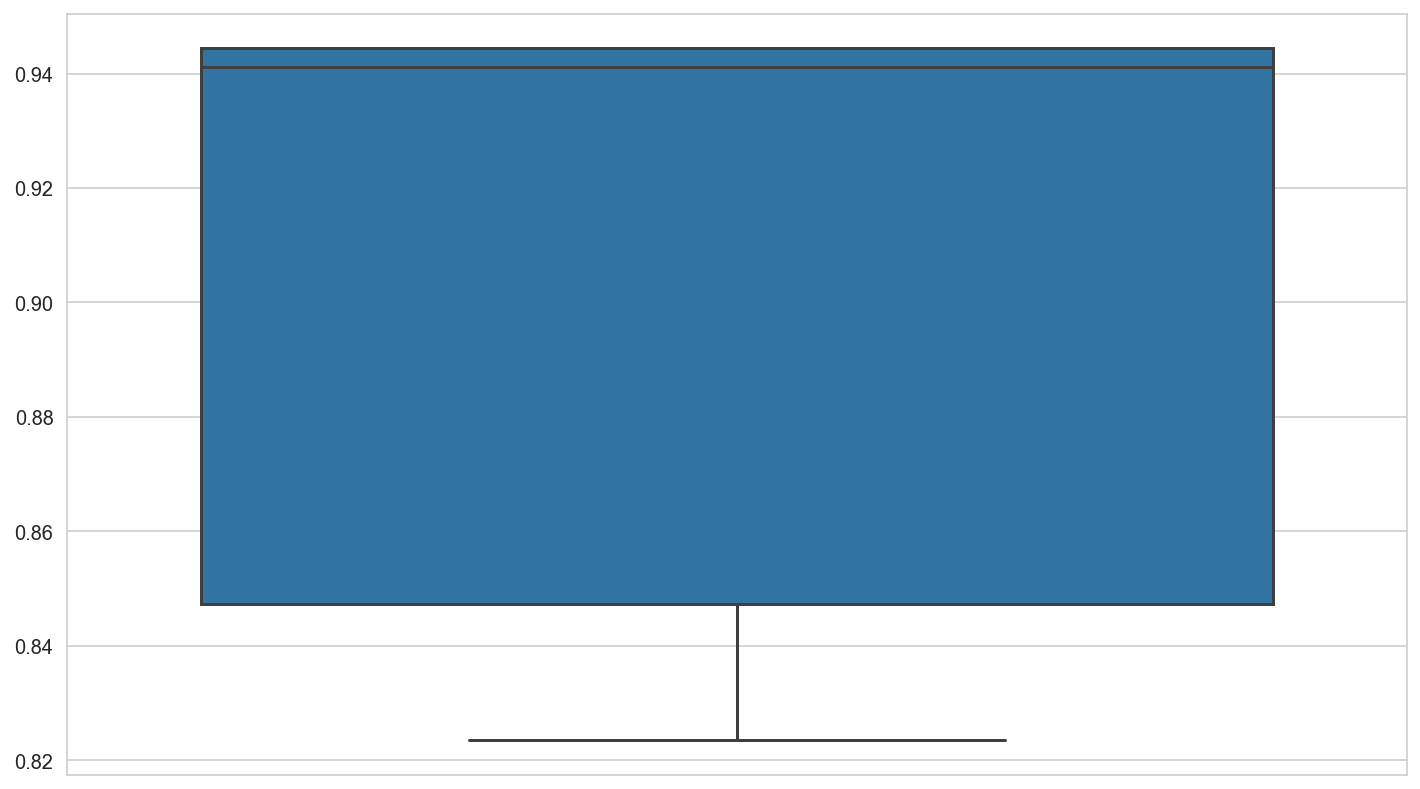

In [124]:

sns.boxplot(vcf_cv['test_score'],orient='vert')

In [125]:

vcf.fit(X_train,y_train)

VotingClassifier(estimators=[('lg',
                              LogisticRegression(C=1.46, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkows...
                                            

In [126]:

pred=vcf.predict(X_val)

In [127]:

accuracy_score(y_val,pred)

0.9111111111111111

##### Nevertheless, we do not appear able to beat out the test accuracy of logistic regression alone. We stick with logistic regression as our best model

## Semi-Supervised Learning

##### Earlier, we cited the lack of practicality in predicting 'unresolved' cases as reason for their exclusion. We can essentially view these cases as 'unlabeled,' since all of them eventually must die or recover. In this unique situation then where we have much more unlabeled observations than labeled, we can use semi-supervised learning techniques such as Label Spreading or Label Propagation to label them. These methods essentially work by comparing the unlabeled observations to the labeled using KNN or RBF algorithms. Unlabled observations are then labeled, thus increasing our training data substantially for future employment of supervised techniques. The interpretation of prediction with this newly labeled data is still limited however, given the large amount of uncertainty we introduce.

##### First we convert our status variable into the required format for these algorithms, where -1 are our 'unlabeled' entries, 0 is dead, and 1 is recovered 

In [163]:
y_arr = covid4['status']
y1 = np.where(y_arr==1,-1,y_arr)
y1 = np.where(y1==2,1,y1)







159

In [164]:
from sklearn.semi_supervised import LabelSpreading, LabelPropagation

##### To simplify our process, we eliminate the country variables

In [165]:
X1=covid4.drop('status',axis=1)

X_strip = X1[['gender_male','age','visiting Wuhan','from Wuhan']]


scaled1 = scaler.fit_transform(X_strip)
X_sc1 = pd.DataFrame(scaled1,columns=X_strip.columns)




In [166]:
X_arr = X_sc1.to_numpy()



1085

##### We optimize the kernel and neighbors parameters to find the best performing semi-supervised model

In [167]:
score_list = []
kernel_list = ['rbf','knn']
neighbors_list = np.arange(2,20,1)

for kernel in kernel_list:
    for n in neighbors_list:
        label_prop_model = LabelSpreading(kernel = kernel, n_neighbors = n)
        label_prop_model.fit(X_arr,y1)
        score = label_prop_model.score(X_arr,y1)
        score_list.append(score)

/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_sup

In [168]:
max(score_list)


0.17972350230414746

##### Label Spreading appears to be the best algorithm, with parameters rbf and 7 neighbors

In [169]:
label_prop_model = LabelSpreading(kernel='rbf', n_neighbors = 7)

In [170]:
label_prop_model.fit(X_arr, y1)

LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=30, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [171]:
semi = label_prop_model.transduction_

In [172]:

len(semi[semi==0])

181

In [173]:
len(semi[semi==1])

904

##### Our model predicts 181 deaths and 904 recoveries, with all our data labeled

In [174]:
semi_df = pd.DataFrame(semi)


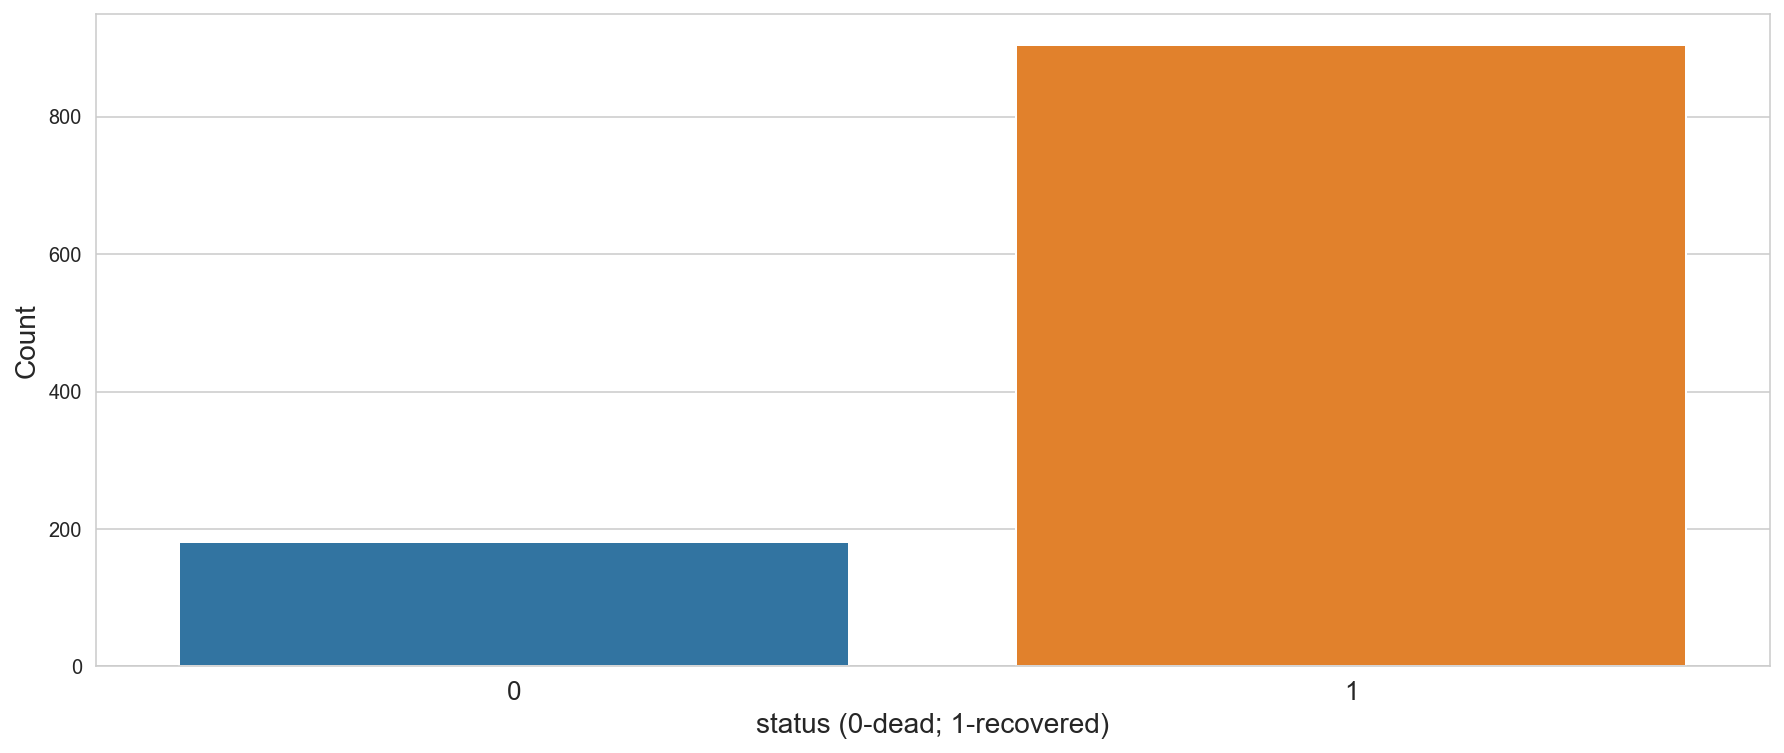

In [175]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x=0,data=semi_df)
plt.xlabel("status (0-dead; 1-recovered)",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(fontsize=13)
plt.show()

##### Now we are interested in making predictions with our full, newly labeled dataset. We employ our best model from before, logistic regression, and re-split our data into training and test sets

In [176]:
semi_series = pd.Series(semi)


In [177]:
scaled1=scaler.fit_transform(X1)
X_semi=pd.DataFrame(scaled1,columns=X1.columns)

In [178]:
X_train1,X_val1,y_train1,y_val1=train_test_split(X_semi,semi_series,test_size=0.2,random_state=11)

In [179]:
lg.fit(X_semi,semi_series)

LogisticRegression(C=1.46, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
pred_lg1=lg.predict(X_val1)

##### We find a test set accuracy of 95%, though this must be taken with a grain of salt given the large amount of data we labeled using semi-supervised methods

In [181]:
accuracy_score(y_val1,pred_lg1)

0.9493087557603687

## Feature Importance

##### We are also interested in determining which variables have the greatest effects on likelihood of death or recovery. The standardized coefficients from our fitted logistic regression model are of use here. The largest absolute values indicate the greatest effects since they are all in the same 'units.' Age has the biggest negative effect on survival chances, followed by being male. Being from Wuhan and China also increases likelihood of potential death. On the other side, visiting Wuhan has the largest positive effect on survival. 

In [147]:
df_coef=pd.DataFrame(lg.coef_,columns=X_sc.columns,index=['Coefficients'])
df_coef.transpose()

,Coefficients
age,-1.696544
visiting Wuhan,0.196508
from Wuhan,0.907695
country_Algeria,0.000000
country_Australia,0.000000
country_Austria,0.000000
country_Bahrain,0.000000
country_Belgium,0.000000
country_Cambodia,0.000000
country_Canada,0.000000


## K-Means Clustering

##### Clustering techniques can help group our data in useful ways without knowing the labels. We utilize K-Means clustering on our simplified dataframe (without the countries).

In [148]:

from sklearn.cluster import KMeans

In [149]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_sc1)
    distortions.append(km.inertia_)

##### Through plotting the number of clusters against the distortion, we can determine the optimal number of clusters. Ideally, our cluster value should be around the 'elbow' of the graph. The elbow occurs at approximately 4.

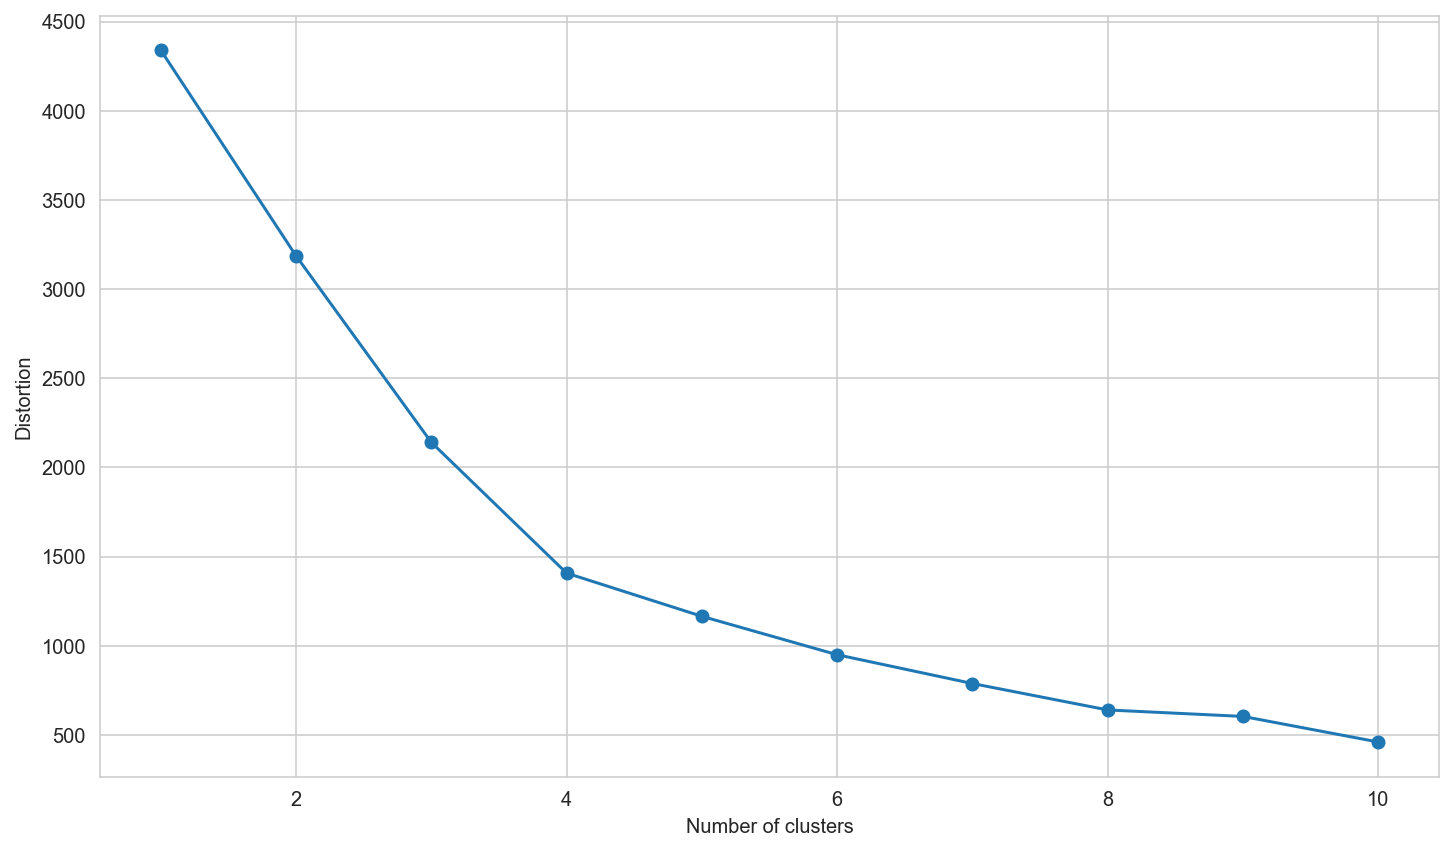

In [150]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [151]:
kmeans4 =KMeans(n_clusters = 4)

In [152]:
X['age']

id
49      61.000000
50      69.000000
51      89.000000
52      89.000000
53      66.000000
          ...    
1033    49.483689
1034    49.483689
1035    49.483689
1036    49.483689
1037    49.483689
Name: age, Length: 222, dtype: float64

In [153]:
y_kmeans4 = kmeans4.fit_predict(X_sc1)

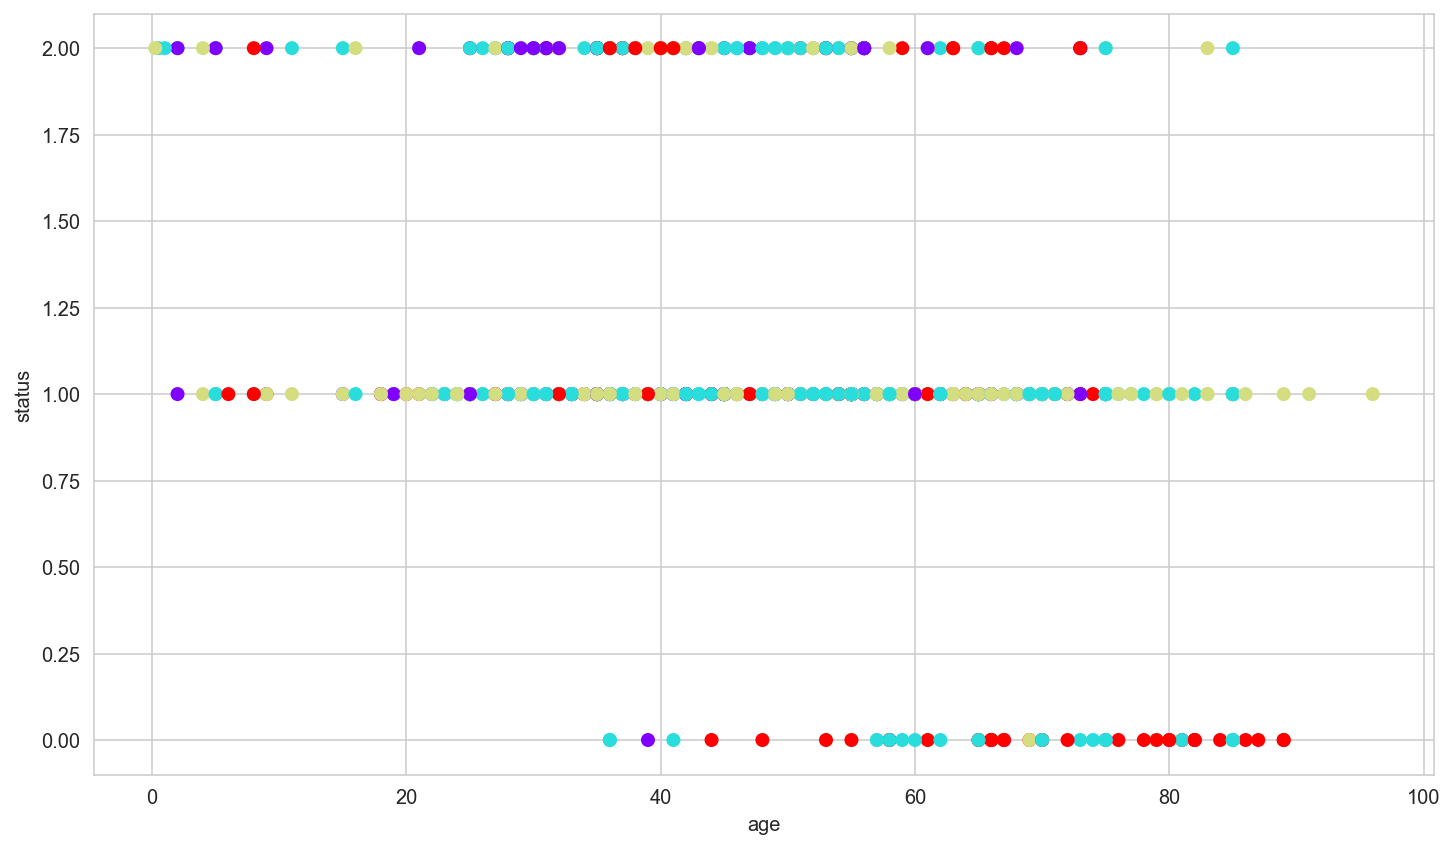

In [154]:
plt.scatter(covid3['age'],y_arr,c=y_kmeans4,cmap='rainbow')
plt.xlabel('age')
plt.ylabel('status')
plt.show()

##### To get a feel for our clusters, we plot them against age and status (0 = dead, 1 = unresolved, 2 = recovered). Though 4 clusters does not fit convienintly into our 'dead' or 'recovered' dichotomy, it provides a finer granularity of information. Of course, our dead population tends to be older, but we see this category is also largely dominated by the red and yellow clusters which are not unanimously older. The unresolved category is predominantly the cyan cluster, suggesting perhaps we were too quick to dismiss this classification of any usefullness. Lastly, the recovered category seems to lack any sort of uniformity entirely, suggesting more information is needed to determine accurately who will recover.

# Works Cited

# https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
### help with showing all text in column

# https://dev.to/chanduthedev/how-to-display-all-rows-from-data-frame-using-pandas-dha
#### help displaying every row in df

# https://pythonprinciples.com/blog/check-if-var-is-string/
#### Check if var is string

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html
#### np.isnan

# https://stackoverflow.com/questions/20025882/add-a-string-prefix-to-each-value-in-a-string-column-using-pandas
#### Append string to column

# https://stackoverflow.com/questions/30485151/python-pandas-exclude-rows-below-a-certain-frequency-count
#### How to select symptoms with certain frequency 

# https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas
#### Group by age range (binning technique).

# https://thispointer.com/pandas-convert-a-dataframe-column-into-a-list-using-series-to_list-or-numpy-ndarray-tolist-in-python/
#### Convert pd column to list 

# https://stackoverflow.com/questions/41806030/split-string-within-list-into-words-in-python
#### How to use split with extend to modify list

#https://www.geeksforgeeks.org/python-string-split/
#### How to use split method


#### Prediction

# https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html#sklearn.semi_supervised.LabelSpreading
### semi supervised techniques

# https://www.w3resource.com/python-exercises/pandas/python-pandas-data-series-exercise-6.php
### manipulating dataframes and series

# https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
### kmeans clustering

# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
### kmeans clustering

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
### kmeans clustering

# https://stackoverflow.com/questions/49161120/pandas-python-set-value-of-one-column-based-on-value-in-another-column
### conditional value setting

<font color='red' size='4'>Instructor Comments:</font>

Overall it was well done! The analysis was fairly thorough and the explanation was good at each step. As a reader I was able to follow easily without having to wonder what each piece of code was doing. 

Points of possible improvement: 

(1) The labels in some of the graphs were difficult to read. 

(2) In the Prediction portion of the project, I would have liked to see at least some of the top symptoms included as well. Having created a separate column for each of the symptoms from the beginning, I think would have also helped with the rest of the presentation as it would have made the code a bit cleaner as well. 

<font color='red' size='5'>Total Score: 
    
    Analysis: 117/120
    
    Prediction: 37/40
    
    Summary: 40/40
    
 </font>